# Assignment 1: Comparison of Regression Models on Housing Prices in Ames, Iowa

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![(Image Credit Boston.gov)](https://miro.medium.com/max/1000/1*WYZCnpM7bE3Wq4NNxx7jDA.jpeg)

In this assignment, you will practice the 8 steps of an end-to-end ML project in the context of a **regression** problem in the [Ames Housing Dataset on Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) (Image Credit: Boston.gov). You will attempt to predict the housing prices in Ames, IA. For references, you may refer to my slides or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same Colab workspace. 

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 50 pts. You will gain points depending on how you perform in the following sections.

*BONUS POINTS:* 10 bonus points will be given (as Extra credits) for those who score among the top-10 performance while following strictly the assignment guidelines. Best of luck to all!

## Step 1: Big Picture and Setup
Write a paragraph explaining the context of the problem in which you are trying to investigate. Your paragraph may frame the problem and objectives by answering the following questions:
* What is the task: regression, classification, clustering, visualization?
* What to expect, how to use, and how to benefit from this model?
* What performance measure to evaluate?
* How much data is available or should be collected?
* What learning algorithm to be used?
* How much effort is to be spent?
* Verify the assumptions that have been made about the context

**What is the task: regression, classification, clustering, visualization?**

The task for this project is a classic example of a regression task. Given various relevant features, we are expected to give an estimate for those features' SalePrice.

**What to expect, how to use, and how to benefit from this model?**

I think that this model is expected to calculate housing prices (output variable SalePrice) given certain classifying features about a house. A possible implementation would be for a realtor or land-acquisition company to scientifically evaluate the price of a house. 

**What performance measure to evaluate?**

The performance measure to evaluate would be the proximity of the model's estimate of a house's price to the house's real sale value. But this comparison is flawed from the get-go due to the subjective nature of house purchasing. A couple confounding variables related to house pricing are: 
- Curb Appeal/Style: Styles come in and out of fashion and can affect the Sale Price
- State of the economy: Houses sold in different times may sell for differing values. Currently the housing market is in a bubble. 
- Negotiation tactics: Home sellers can frame a house so that it can sell for significantly more (or less) than what it is worth

**How much data is available or should be collected**

We have a relatively small dataset (1460 points). With a variety of features. Prominent features include
- Neighborhood
- Overall Quality
- Year Built
- Square Footage Values

**What learning algorithm to be used?**

I will be using a variety of ML algorithms including Linear Regression, Ridge Regression, Decision Tree Regression, and Random Forest Regression. And later on I will average a couple models to see if we experience any performance improvements. 

**How much effort is to be spent?**

As many hours as it takes. 

**Verify the assumptions that have been made about the context**

I'm not too sure I understand what this question is asking for but I'll go over the assumptions I am making about the data: 

Some assumptions:
1. SalePrice has already been corrected for inflation
2. The evaluator(s) are objectively evaluating all houses

## Step 2: Load the Data
We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing values?
 * What are some basic statistics you can learn right away about this dataset?

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Lets establish a function to import our data

import pandas as pd

# sburre code additions here: 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from scipy import stats
import sys

# To help you get started, a load function is provided below. 
# You will need to fill in the code under #TODO to make it work.
def loadBostonHousingData():
  # The column names are adopted from the dataset page on Kaggle   
  housing = pd.read_csv('/content/drive/MyDrive/ML-ColabNotebooks/Codeathon1/Data/train.csv')
  return housing

Mounted at /content/drive


In [3]:
# lets load the data and apply ordering to the relevant categorical columns: 
# this is useful for later stuff (encoding and general graphing)

housing = loadBostonHousingData()

housing["GarageQual"] = pd.Categorical(housing.GarageQual, categories = ["Ex", "Gd", "TA", "Fa", "Po", "NA"], ordered=True )
housing["LotShape"] = pd.Categorical(housing.LotShape, categories = ["Reg", "IR1", "IR2", "IR3"], ordered = True )
housing["LandContour"] = pd.Categorical(housing.LandContour, categories = ["Lvl", "Bnk", "Hls", "Low"], ordered = True )
housing["Utilities"] = pd.Categorical(housing.Utilities, categories = ["AllPub", "NoSewr", "NoSeWa", "ELO"], ordered = True )
housing["LandSlope"] = pd.Categorical(housing.LandSlope, categories = ["Gtl", "Mod", "Sev"], ordered = True )
housing["ExterQual"] = pd.Categorical(housing.ExterQual, categories = ["Ex", "Gd", "TA", "Fa", "Po"], ordered = True )
housing["ExterCond"] = pd.Categorical(housing.ExterCond, categories = ["Ex", "Gd", "TA", "Fa", "Po"], ordered = True )
housing["BsmtQual"] = pd.Categorical(housing.BsmtQual, categories = ["Ex", "Gd", "TA", "Fa", "Po", "NA"], ordered = True )
housing["BsmtCond"] = pd.Categorical(housing.BsmtCond, categories = ["Ex", "Gd", "TA", "Fa", "Po", "NA"], ordered = True )
housing["BsmtExposure"] = pd.Categorical(housing.BsmtExposure, categories = ["Gd", "Av", "Mn", "No", "NA"], ordered = True )
housing["BsmtFinType1"] = pd.Categorical(housing.BsmtFinType1, categories = ["GLQ", "ALQ", "BLQ", "Rec", "LwQ", "Unf", "NA"], ordered = True )
housing["BsmtFinType2"] = pd.Categorical(housing.BsmtFinType2, categories = ["GLQ", "ALQ", "BLQ", "Rec", "LwQ", "Unf", "NA"], ordered = True )
housing["HeatingQC"] = pd.Categorical(housing.HeatingQC, categories = ["Ex", "Gd", "TA", "Fa", "Po"], ordered = True )
housing["Electrical"] = pd.Categorical(housing.Electrical, categories = ["SBrkr", "FuseA", "FuseF", "FuseP", "Mix"], ordered = True )
housing["KitchenQual"] = pd.Categorical(housing.KitchenQual, categories = ["Ex", "Gd", "TA", "Fa", "Po"], ordered = True )
housing["Functional"] = pd.Categorical(housing.Functional, categories = ["Typ", "Min1", "Min2", "Mod", "Maj1", "Maj2", "Sev", "Sal"], ordered = True )
housing["FireplaceQu"] = pd.Categorical(housing.FireplaceQu, categories = ["Ex", "Gd", "TA", "Fa", "Po", "NA"], ordered = True )
housing["GarageFinish"] = pd.Categorical(housing.GarageFinish, categories = ["Fin", "RFn", "Unf", "NA"], ordered = True )
housing["GarageQual"] = pd.Categorical(housing.GarageQual, categories = ["Ex", "Gd", "TA", "Fa", "Po", "NA"], ordered = True )
housing["GarageCond"] = pd.Categorical(housing.GarageCond, categories = ["Ex", "Gd", "TA", "Fa", "Po", "NA"], ordered = True )
housing["PavedDrive"] = pd.Categorical(housing.PavedDrive, categories = ["Y", "P", "N"], ordered = True )
housing["PoolQC"] = pd.Categorical(housing.PoolQC, categories = ["Ex", "Gd", "TA", "Fa", "Po"], ordered = True )
housing["Fence"] = pd.Categorical(housing.Fence, categories = ["GdPrv", "MnPrv", "GdWo", "MnWw", "NA"], ordered = True )
housing["MSZoning"] = pd.Categorical(housing.MSZoning, categories = ["RP", "RL", "RM", "RH", "NA"], ordered = True )


#housing["SaleType"] = pd.Categorical(housing.SaleType, categories = ["New", "Con", "CWD", "WD", "VWD", "COD", "ConLW", "ConLI", "ConLD", "Oth"], ordered = True )

#housing.columns
housing.info()
housing.memory_usage()
sys.getsizeof(housing)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1385 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   object  
 6   Alley          91 non-null     object  
 7   LotShape       1460 non-null   category
 8   LandContour    1410 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   object  
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   object  
 13  Condition1     1460 non-null   object  
 14  Condition2     1460 non-null   object  
 15  BldgType       1460 non-null   object  
 16  HouseStyle     1460 non-null   object  
 17  OverallQual    1460 non-null   in

2213582

Ok we can see the columns as well as the fact that we have 4068318 bytes worth of data. Something to note is that our overall data is split in half between the training and the test data. What exactly is categorical data though? Lets do some basic stats before we look at missing values though. 

Some of the stuff we did in the practice notebook included:
- per-colunn summary (housing.info())
- counts of each value in a feature (housing[x].value_counts())
- housing.describe()
- hists for each category

Data transformations applied: 
- normalization of data overall
- stratified sampling

In the sample project, the data wasn't split between test and train data. So here I think we can use all of the data as training data. And use the method where we partition the data and use portions as training data instead. 

In [4]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Lets get rid of Id rq: 

In [5]:
housing.drop("Id", axis = 1, inplace=True)
housing.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
housing.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Before we move forward lets answer the following questions: 

**How big is your dataset? (in terms of MB)**

The dataset is 4068318 bytes large. In terms of MB that is about 4 MB. Interestingly, the excel file is only about 450 KB.

**How many entries does it have?**

This dataset has 1460 entries. 

**How many features does it have?**

The dataset has 80 features. 

**Does it contain any categorical data?**

What exactly is categorical data? 

Okay got an answer. Categorical data is data that can be divided into groups. LotShape, LandContour, etc. are categorically partitioned. So yes, this dataset does contain categorical data. 

**Is there any missing values?**

There are some missing values (to be seen later). 

**What are some basic statistics you can learn right away about this dataset?**

I am actually about to address this below: 

## Step 3. Discover and visualize the data to gain insights
**Data Discovery:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than others. This information will help you confirm the weights of your regression model later on.

At this point in the process, the provided template does two things. The first is the normalization to a bell curve and the other is the Stratified Shuffle Split. 

I'll get around to this once we have a smaller dataset to deal with (lower number of features). 

We'd probably want a location type thing here (where we plotted out the house locations) but here we have to do something else. 

Overall, I've divided the data into four types: 
- Categorical with ordering
- Catageorical with Numerical Orderign
- Categorical
- Numerical

I want to assess and analyze each of these separately. But before we do that, lets look at SalePrice: 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 180921.20 and sigma = 79415.29



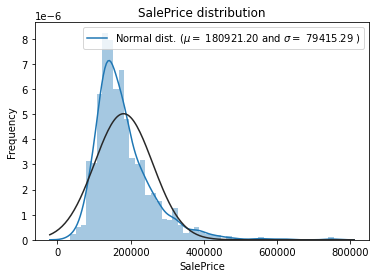

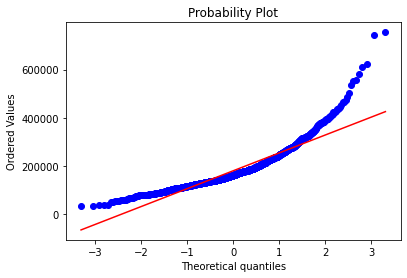

In [7]:
from scipy.stats import norm, skew

sns.distplot(housing['SalePrice'], fit = norm); 
(mu, sigma) = norm.fit(housing['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
                                                    
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(housing['SalePrice'], plot=plt)
plt.show()

As we can see, our SalePrice is skewed to the left. And our model is a linear model which loves normal distributions within the data. So eventually we should transform this via a log. 

In testing, the log transformation demonstrated signifcant performance improvements despite being forced to manually complete RMSE computations due to the added complexity that logs introduce. 

$RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$

But if d_i and f_i are replaced with log values we get something like: 

$RMSE = \sqrt{\frac{1}{n}\Pi_{i=1}^{n}{\Big( log(\frac{d_i}{f_i})^{2/\sigma_i}\Big)}}$

And that is clearly a pain to address.






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


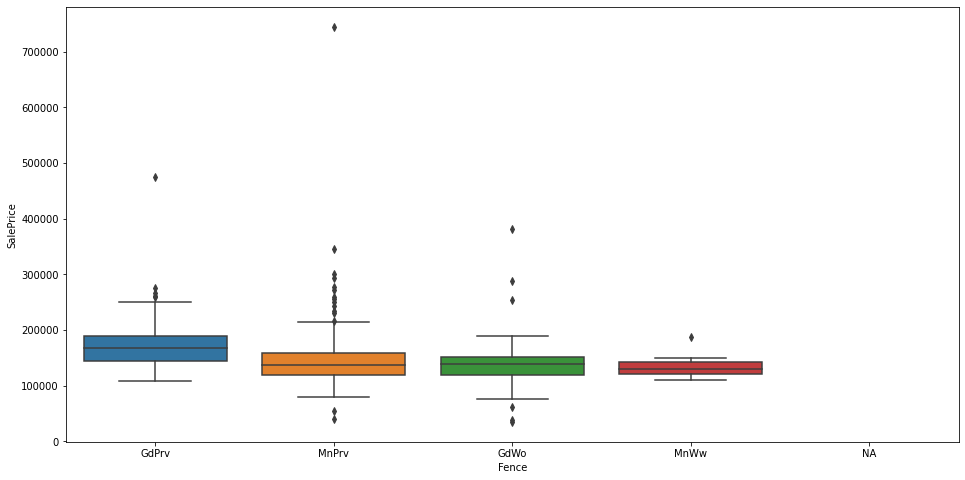

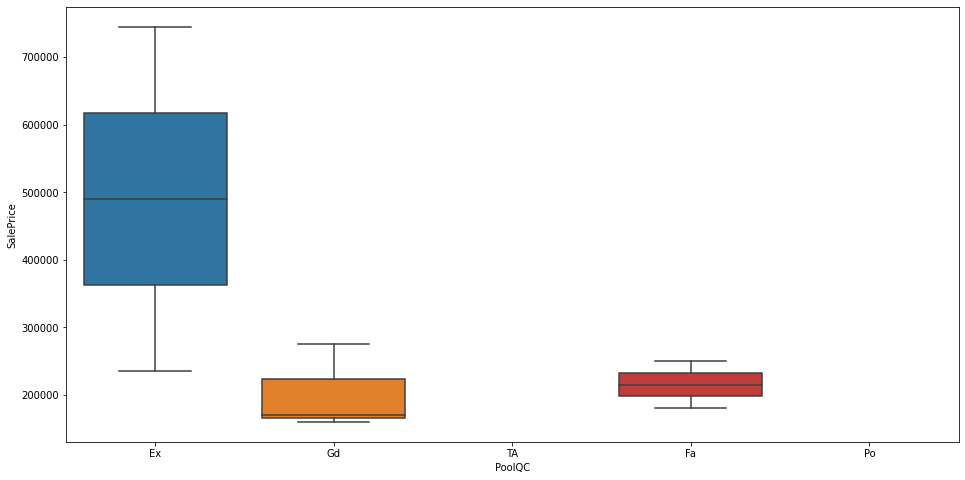

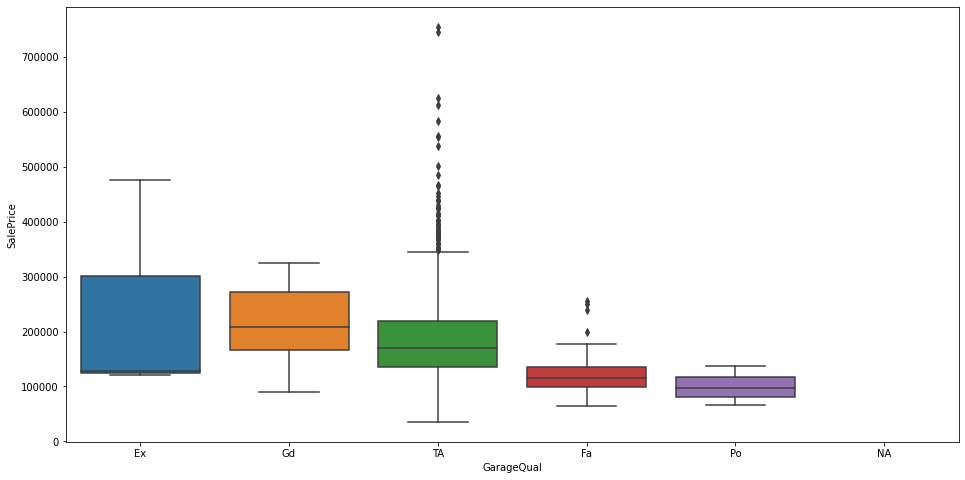

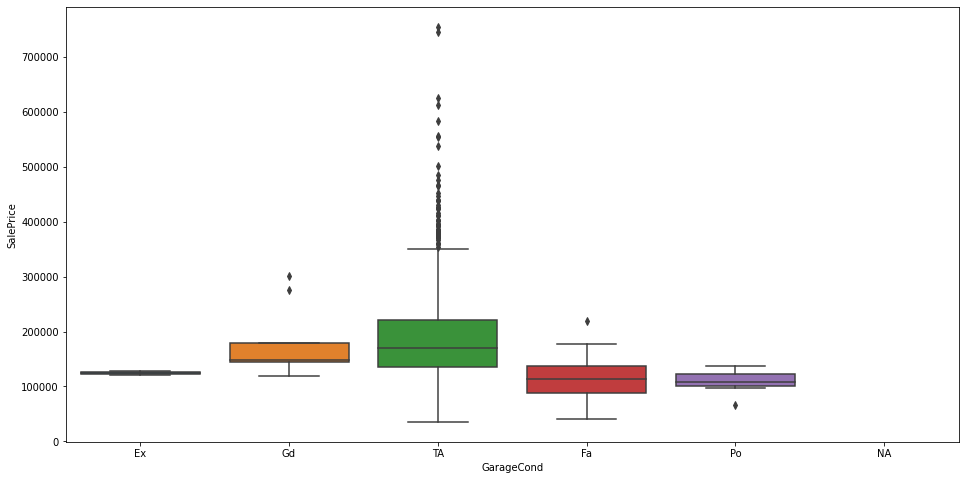

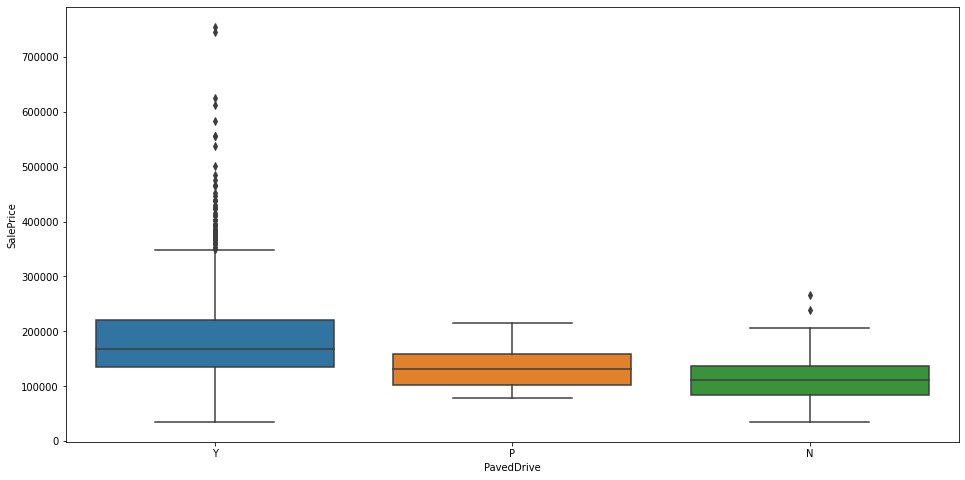

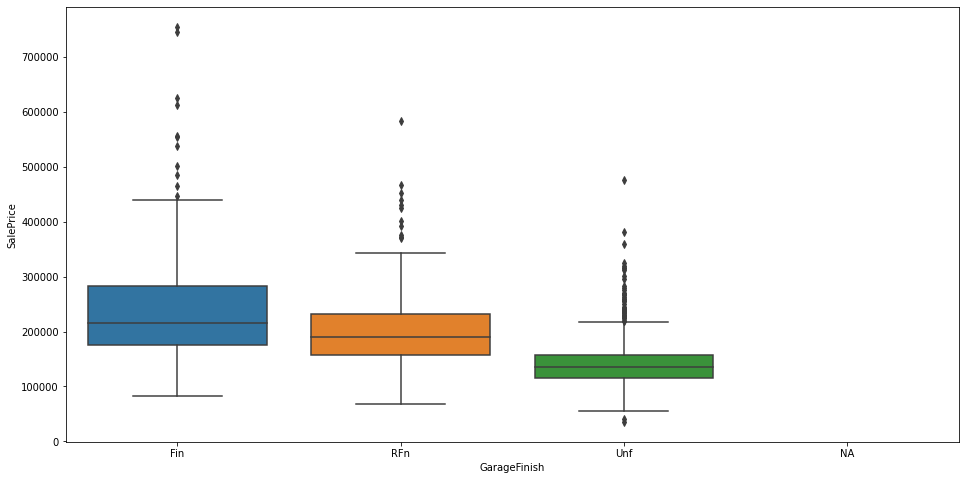

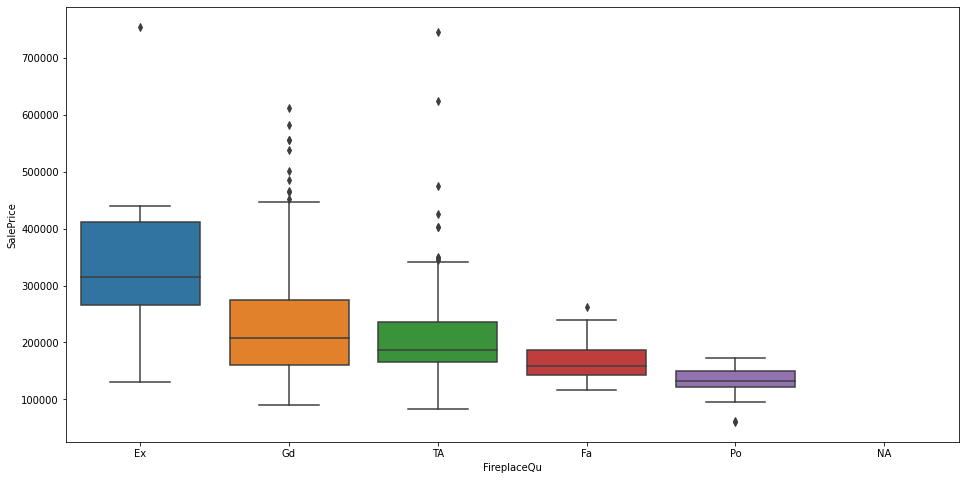

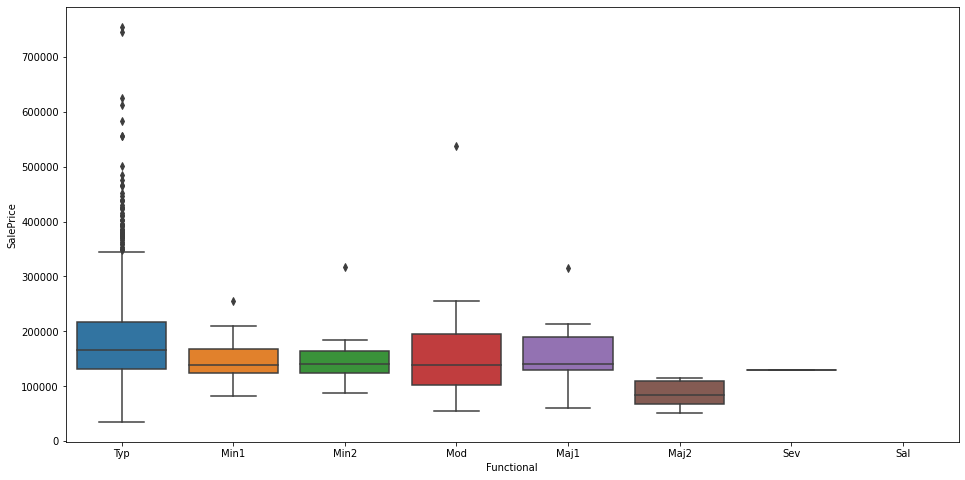

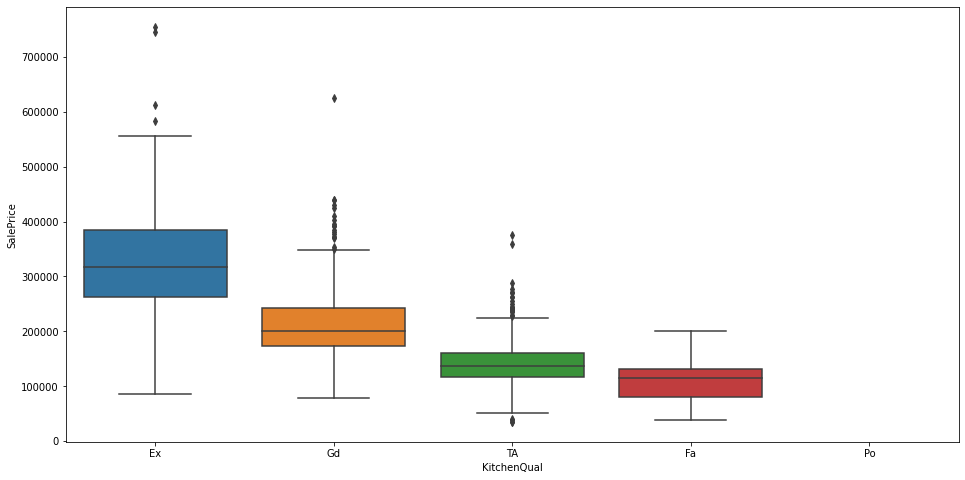

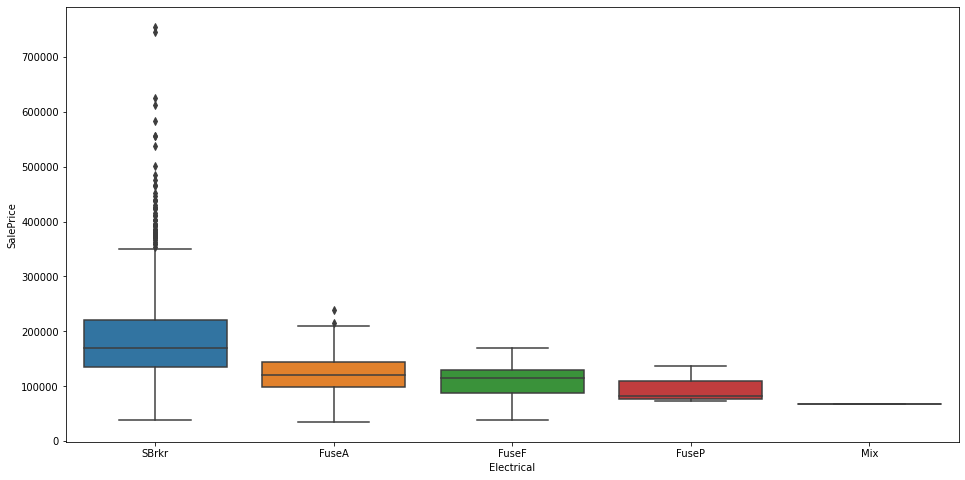

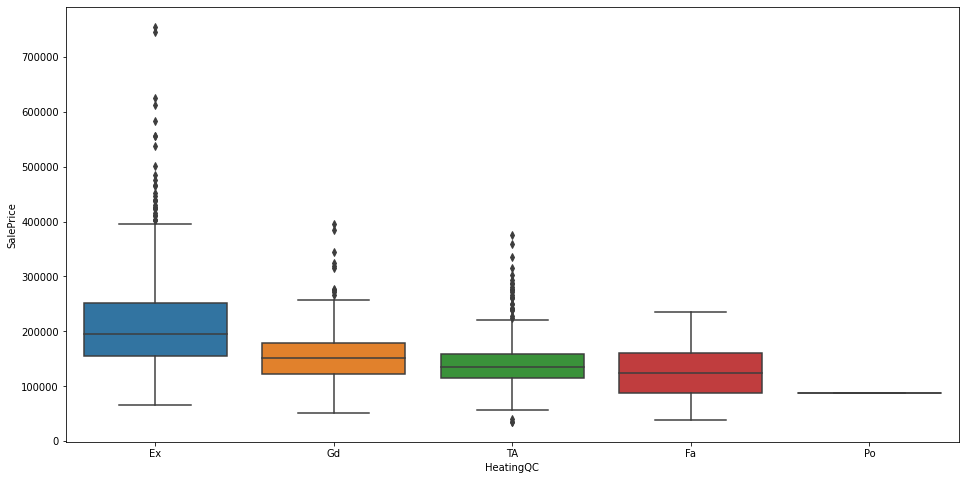

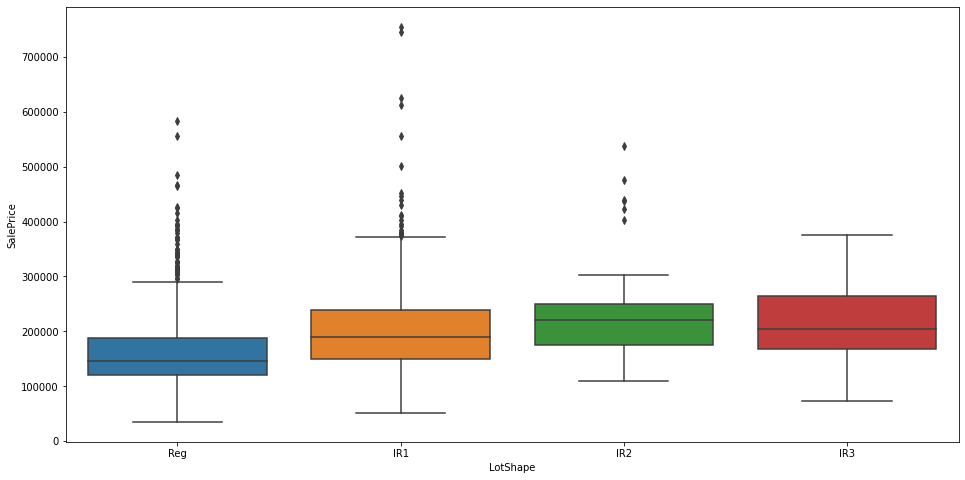

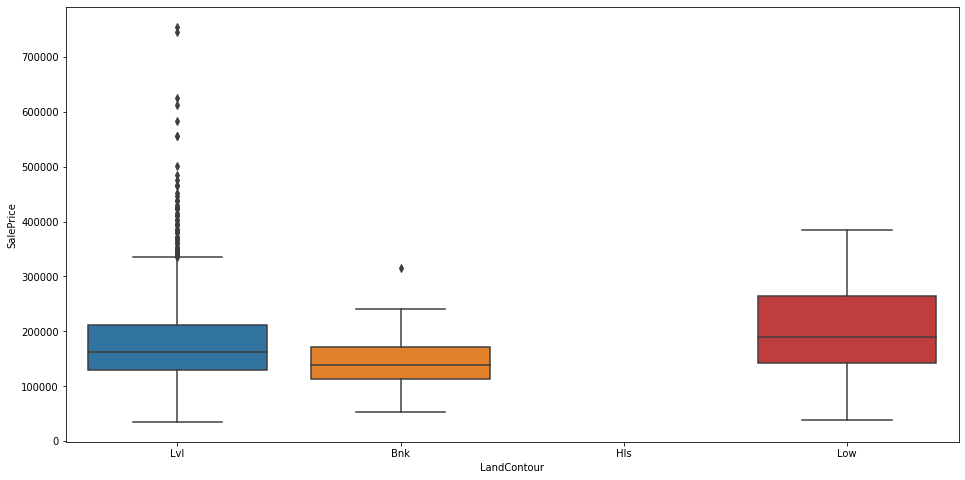

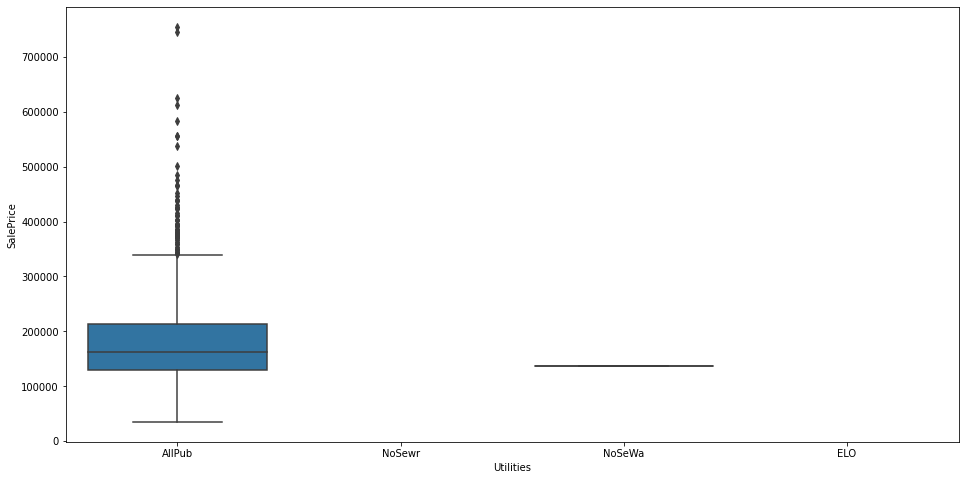

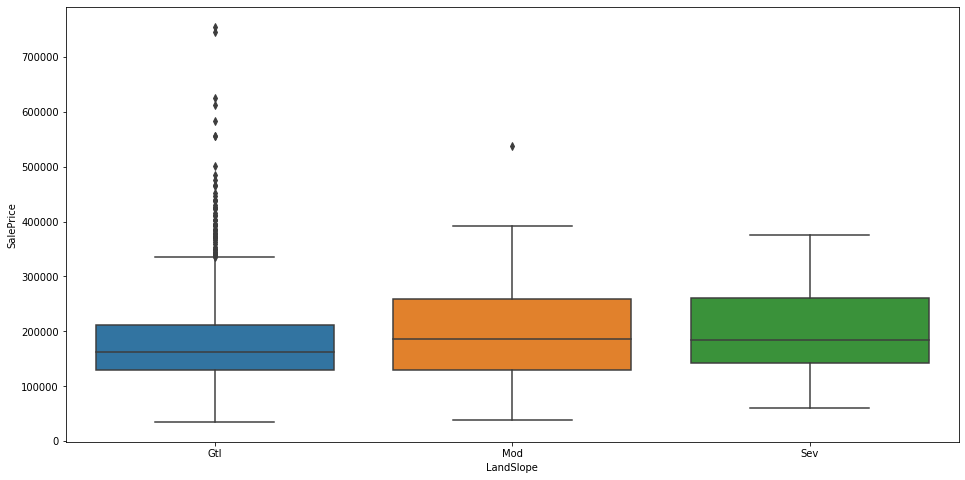

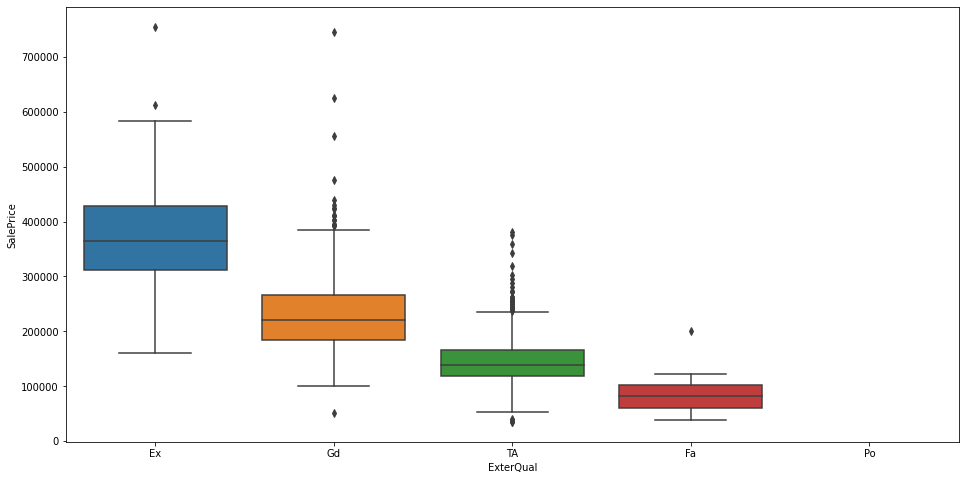

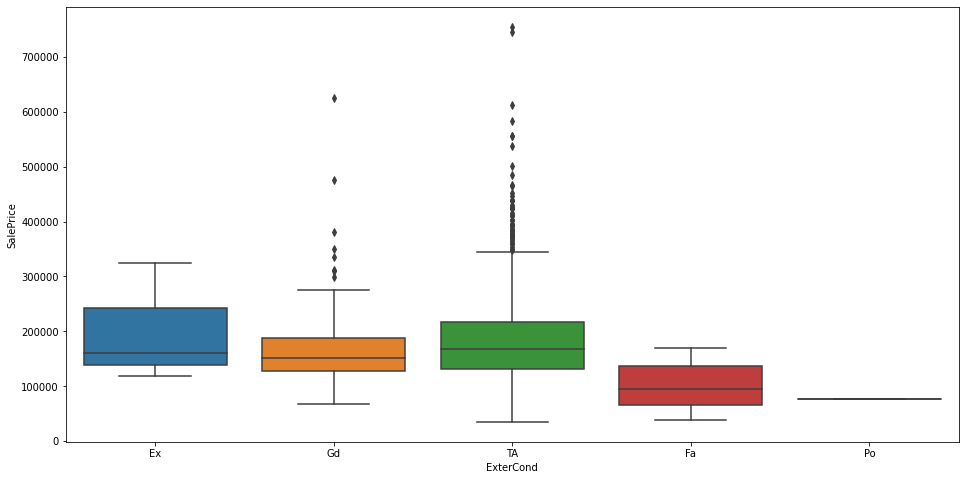

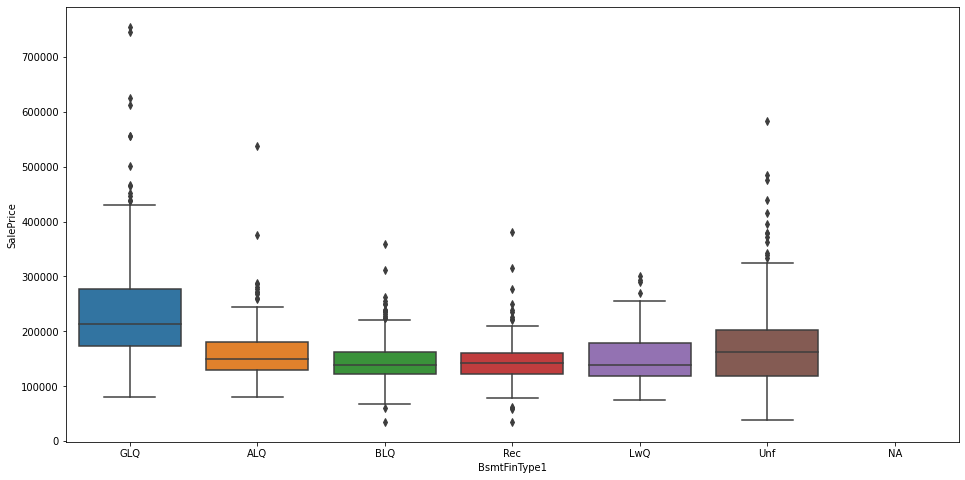

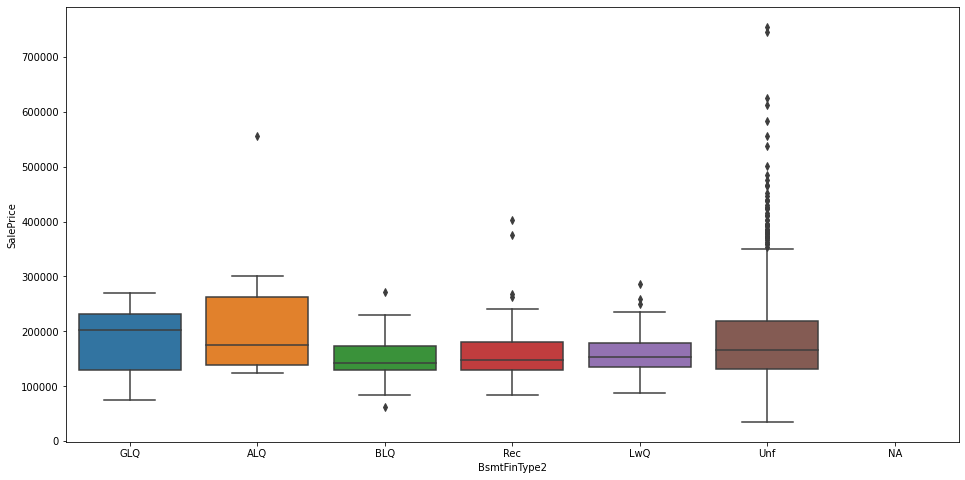

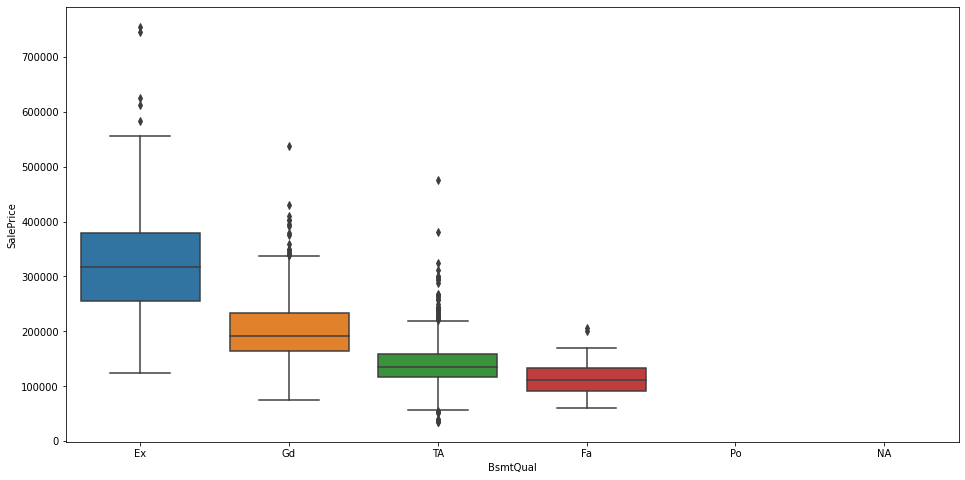

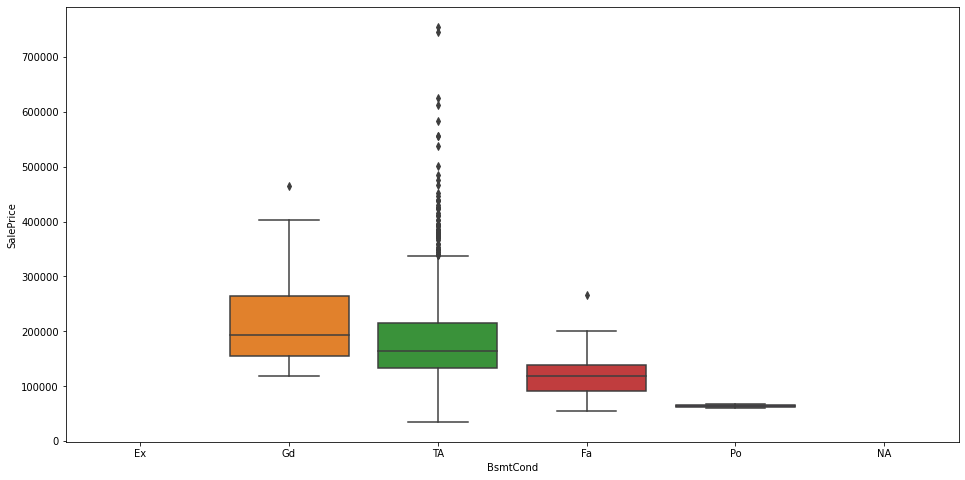

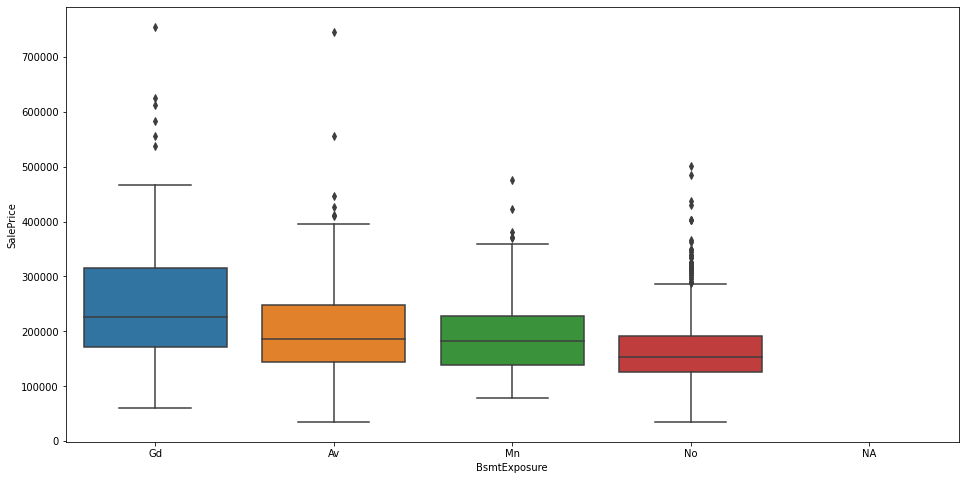

In [11]:
categorical_w_ordering_data_list = ['Fence', 'PoolQC', 'GarageQual', 'GarageCond', 'PavedDrive', 'GarageFinish', 
                                    'FireplaceQu', 'Functional', 'KitchenQual', 'Electrical', 'HeatingQC', 
                                     'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 
                                    'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtExposure',]

for var in categorical_w_ordering_data_list:
  data = pd.concat( [housing['SalePrice'], housing[var]], axis=1) # I believe this takes the two specified axis and pairs them. 
  f, ax = plt.subplots(figsize=(16,8))
  fig = sns.boxplot(x = var, y = 'SalePrice', data=data)

The initial step where we add ordering to all of these categorical variables has proved very handy. By assigning an ordering, we can better see a correlation between various categories and SalePrice. This is very obvious in features such as FirePlaceQu, KitchenQual, and ExterQual. 

A point to note is that for many of these features, I assume that if a datapoint's feature entry is empty, it defaults to the lowest category (NA or Po). Although it is not evident here, that default performs very well and maintains the SalePrice correlation ordering property for most features. 

Ok so a lot of these graphs really good, they show a distinct correlation with SalePrice. And they have the added benefit of not needing to be one-hot encoded. By avoid one-hot encoding we can drastically reduce the size of each point. Instead we can OrdinallyEncode the **ordered** categorical values with NA/Po=0. 

But some of these ordered categorical variables don't display a distinct correlation with Saleprice: 
 - PoolQC
 - GarageCond
 - Functional
 - Utilities
 - BsmtFinType1 
 - BsmtFinType2

I propose removing these variables in later steps

Now lets look at Categorical with Numerical Ordering: 

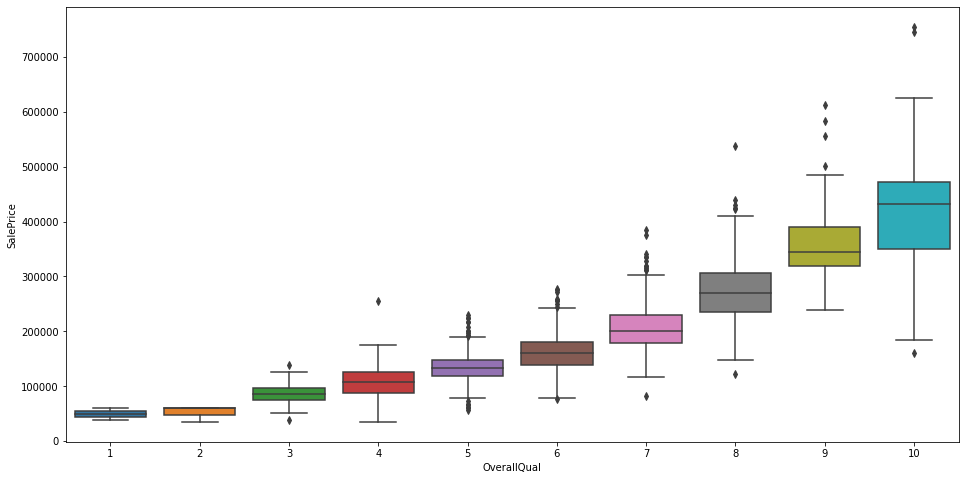

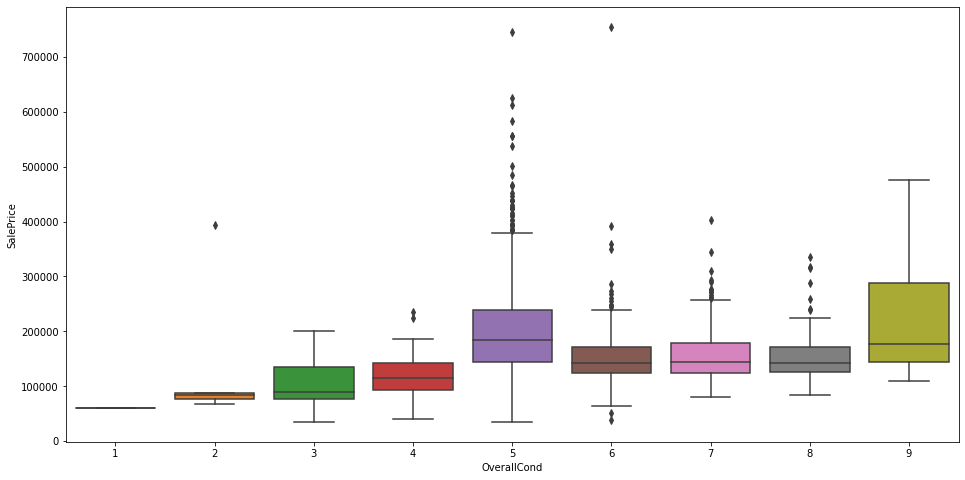

In [ ]:
categorical_num_ordering_data_list = ['OverallQual', 'OverallCond']

for var in categorical_num_ordering_data_list:
  data = pd.concat( [housing['SalePrice'], housing[var]], axis=1) # I believe this takes the two specified axis and pairs them. 
  f, ax = plt.subplots(figsize=(16,8))
  fig = sns.boxplot(x = var, y = 'SalePrice', data=data)

Both of these are really good with OverallQual being super good. But OverallCond is not as good so it might be removed. 

Something I thought about extensively with a lot of these Categorical features was to seperate each into two or three buckets that are highly differentiated. So for OverallCond a couple buckets would be (1, 2), (3, 4), (6, 7, 8), and (5, 9). And we would assign "new" categories as such. But I decided against it due to the added complexity and low marginal benefit. 

Now lets look at categorical data without ordering: 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


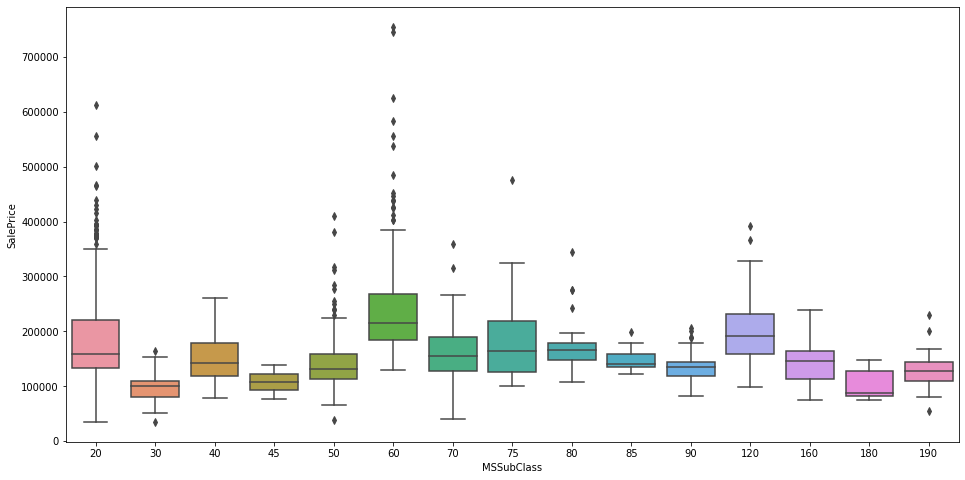

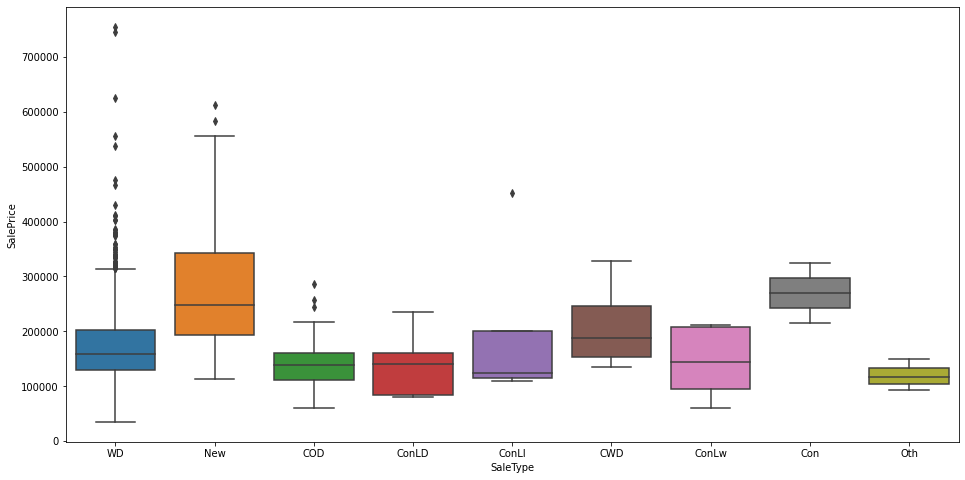

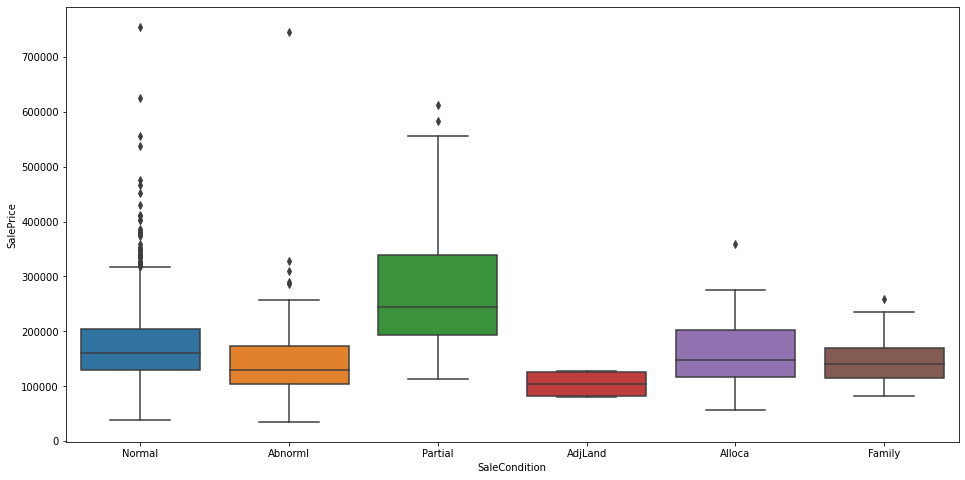

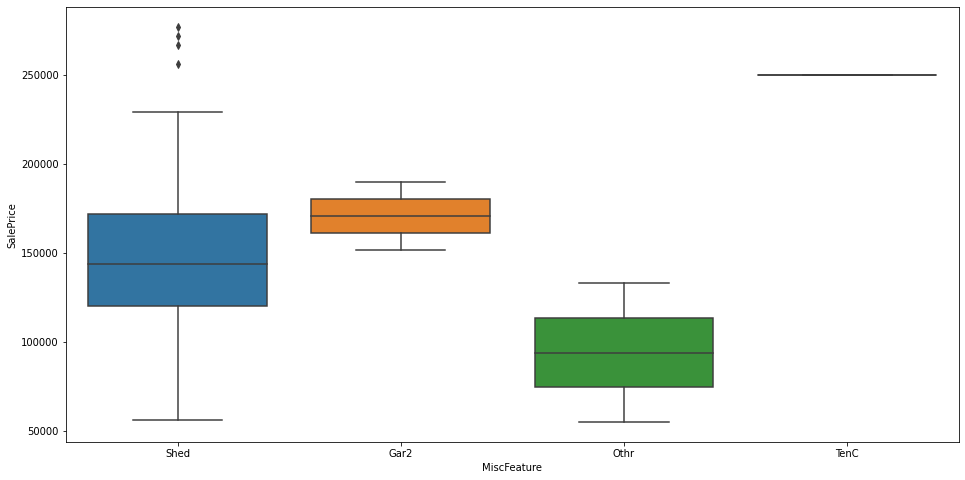

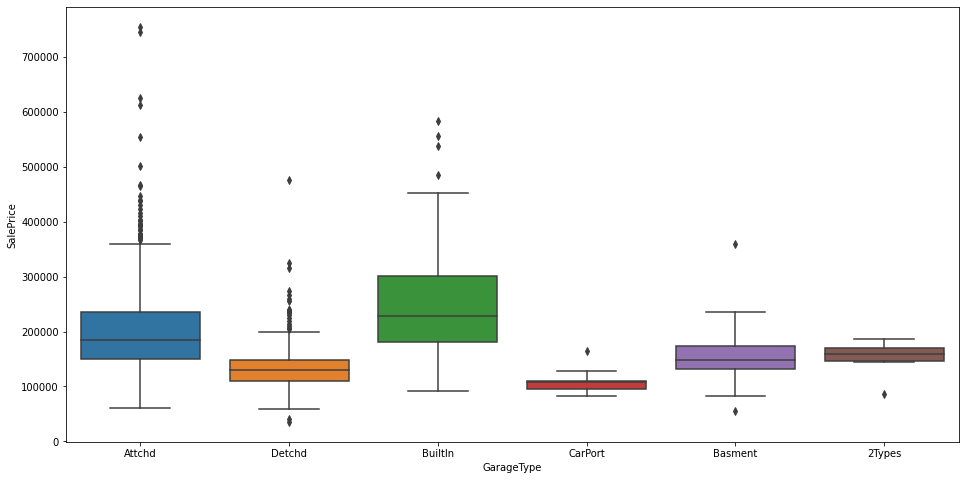

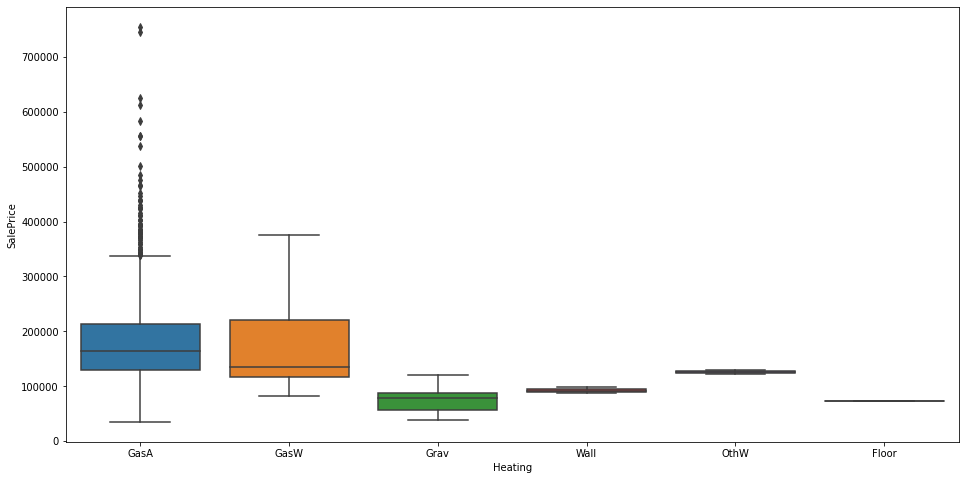

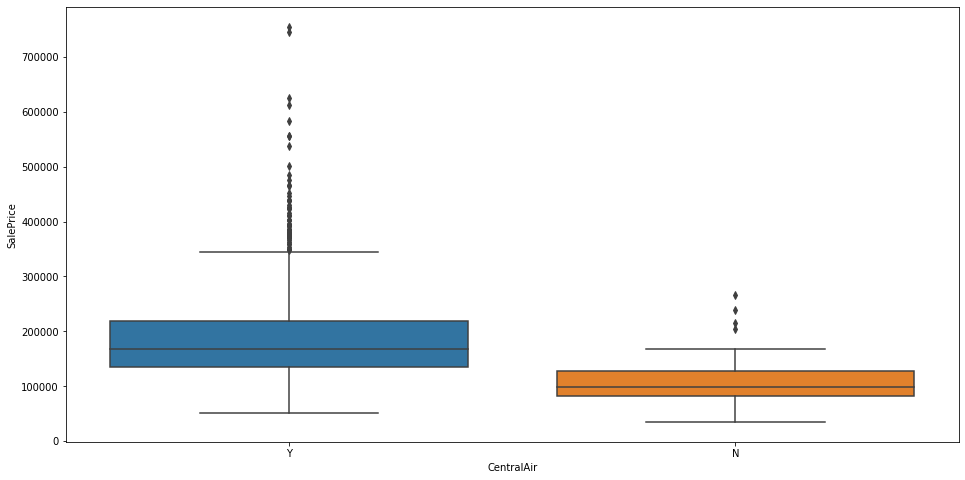

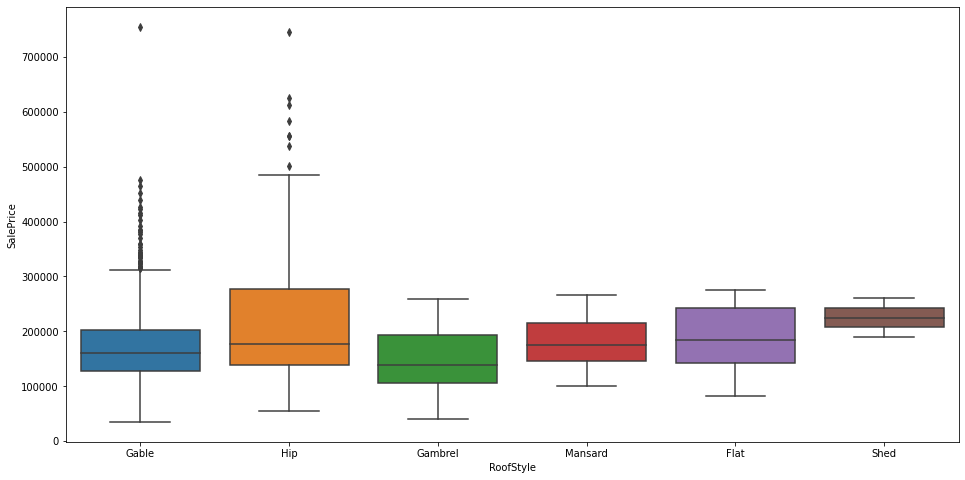

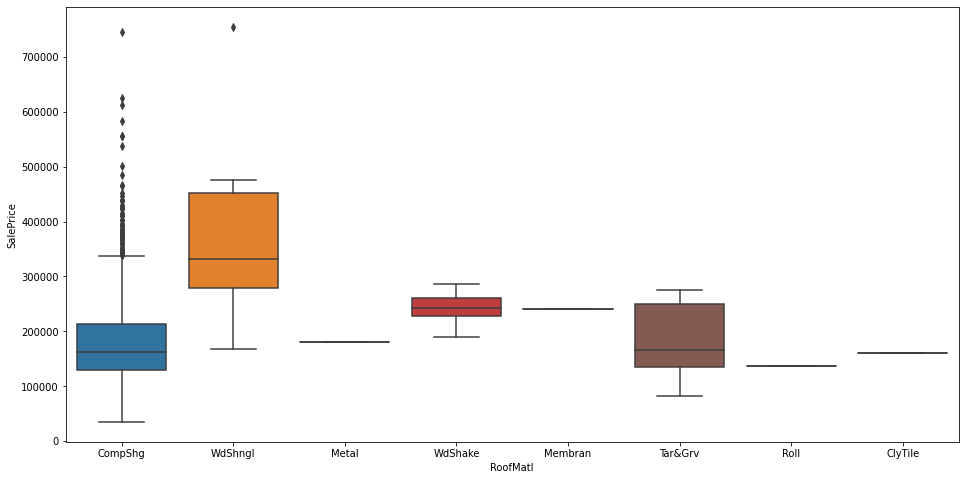

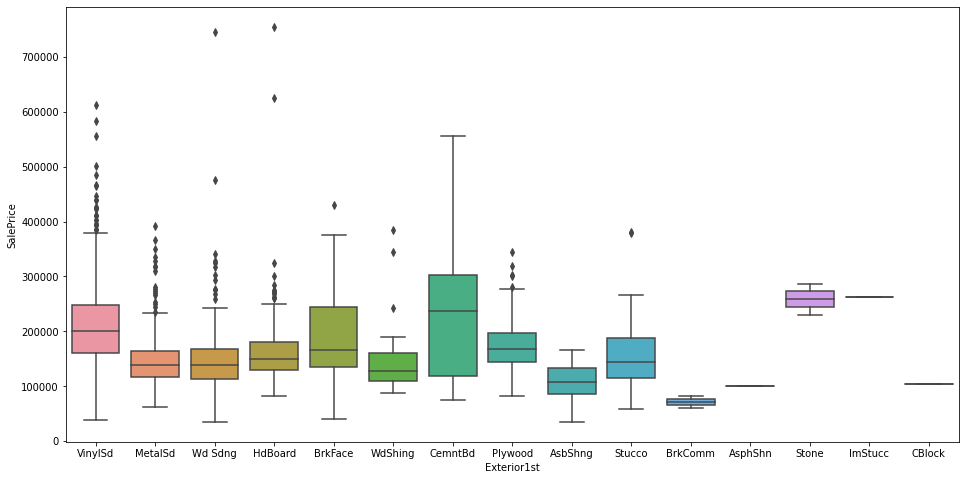

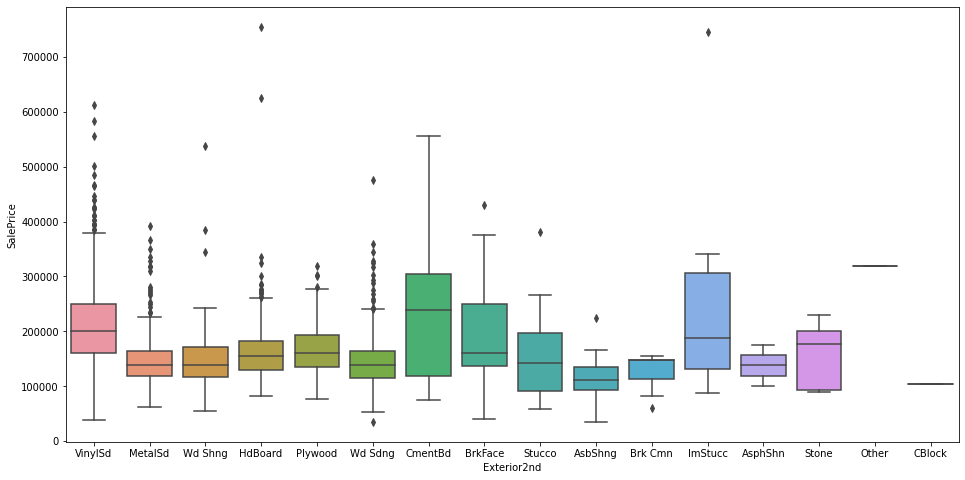

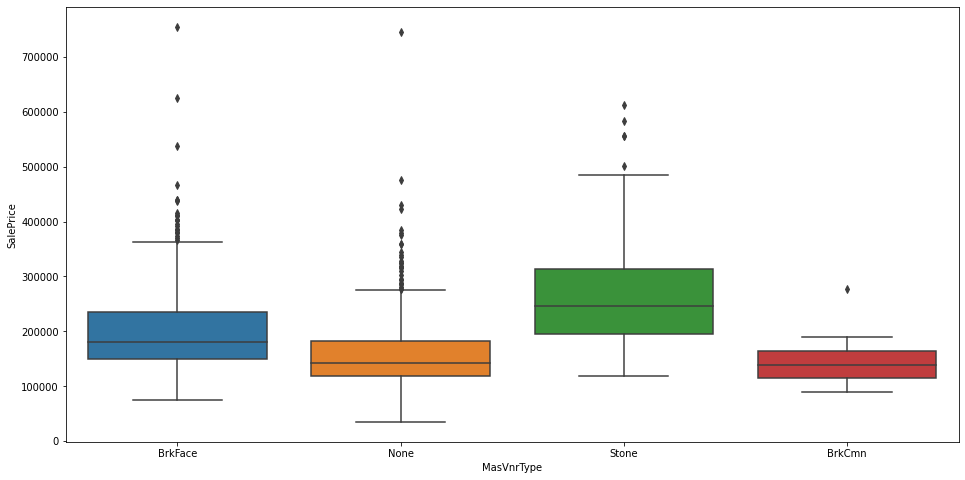

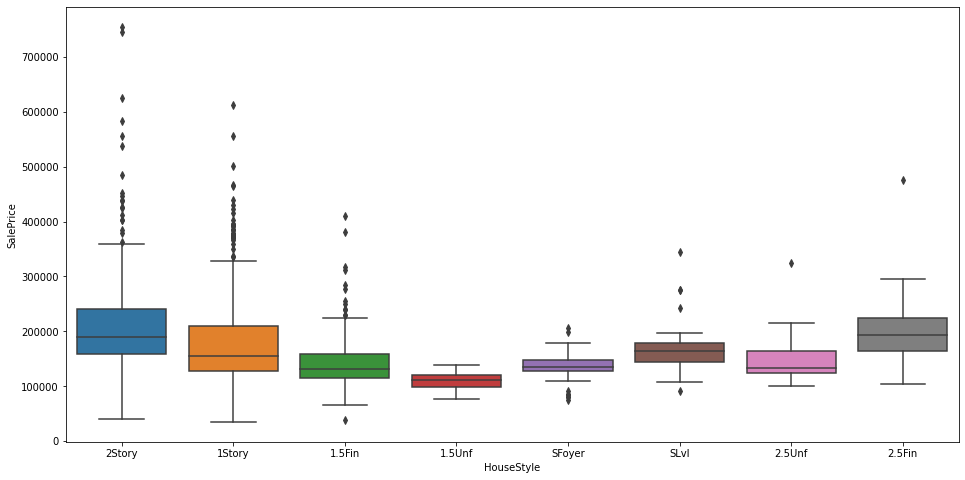

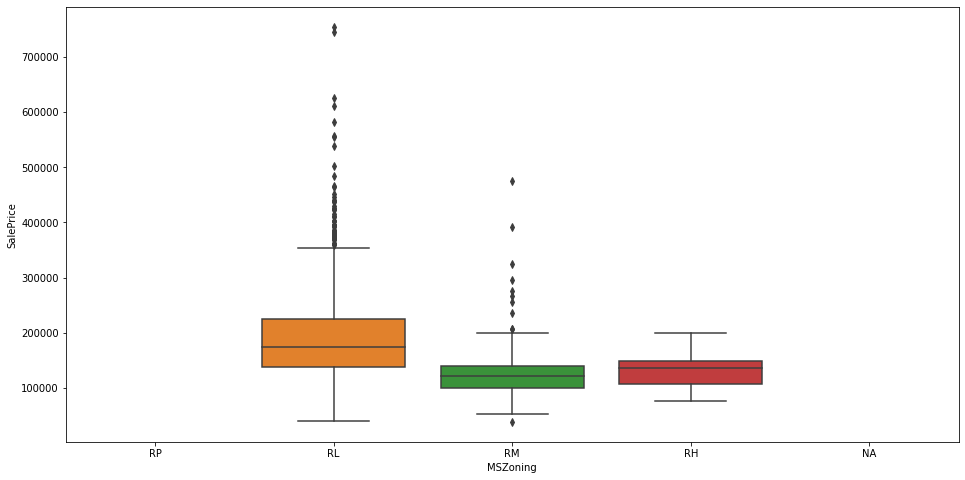

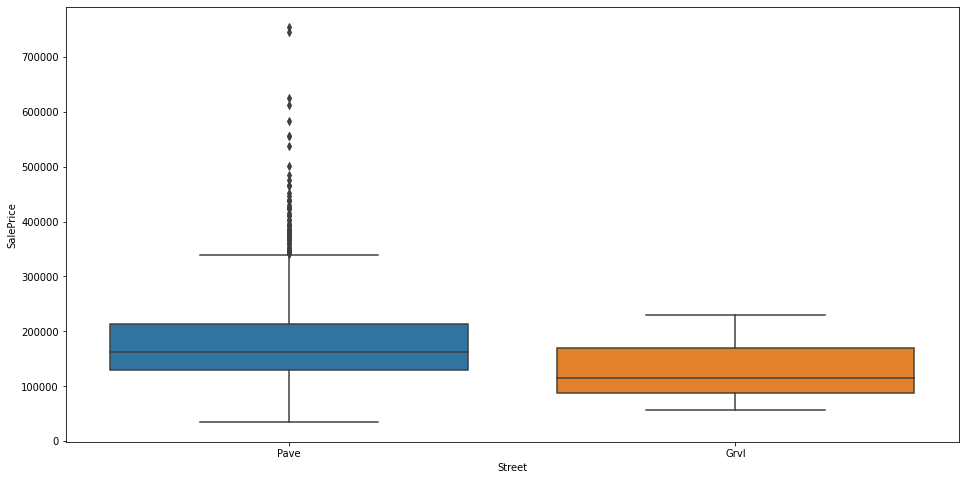

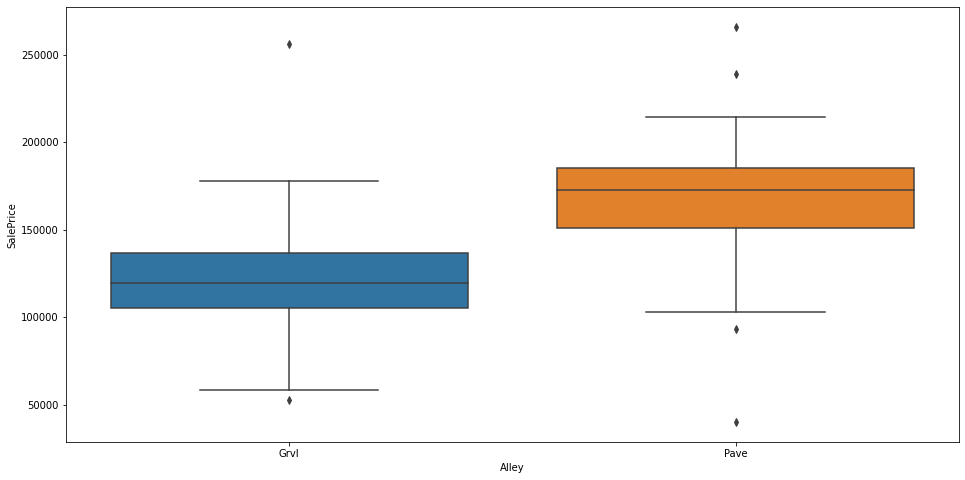

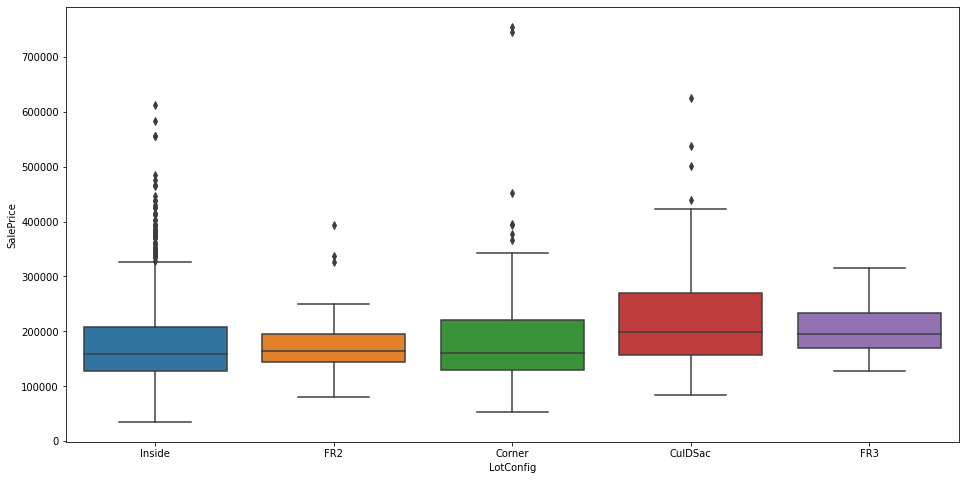

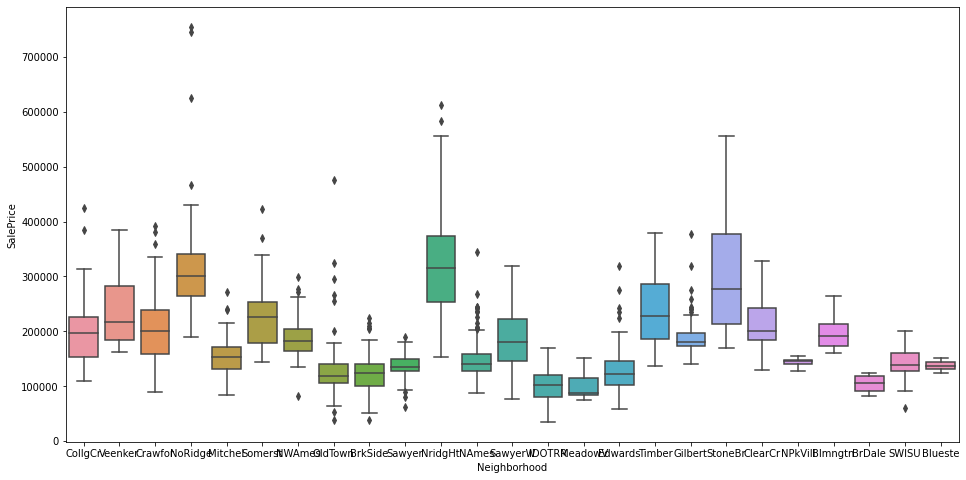

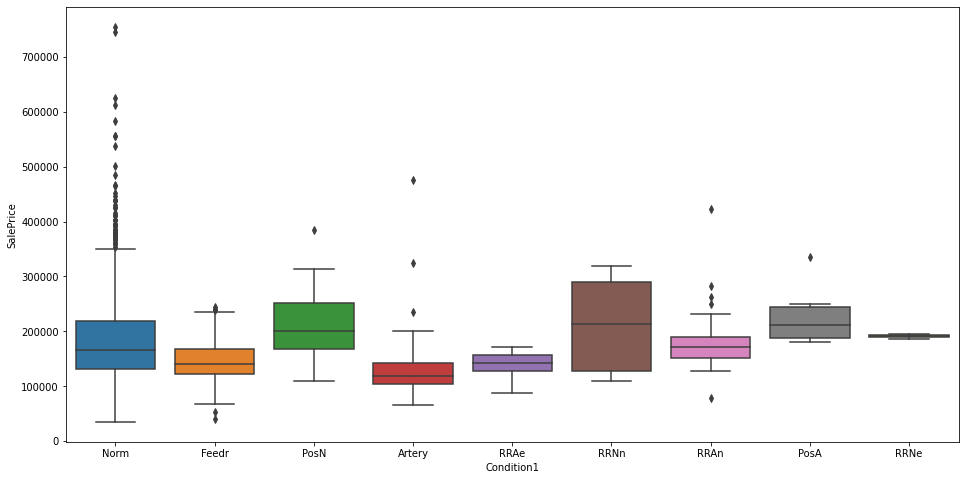

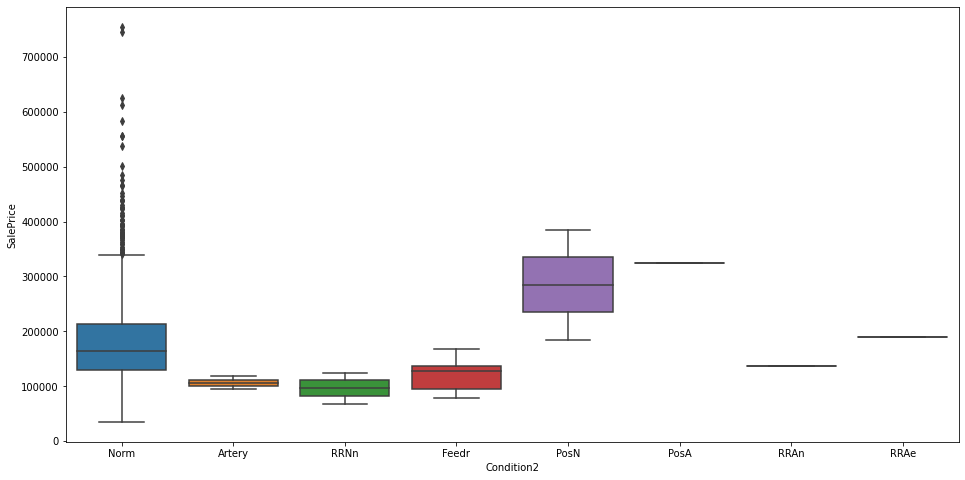

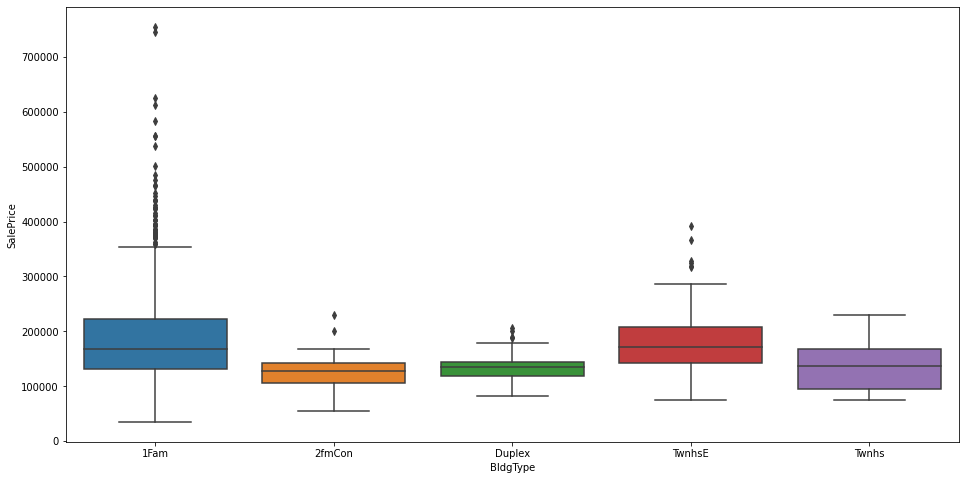

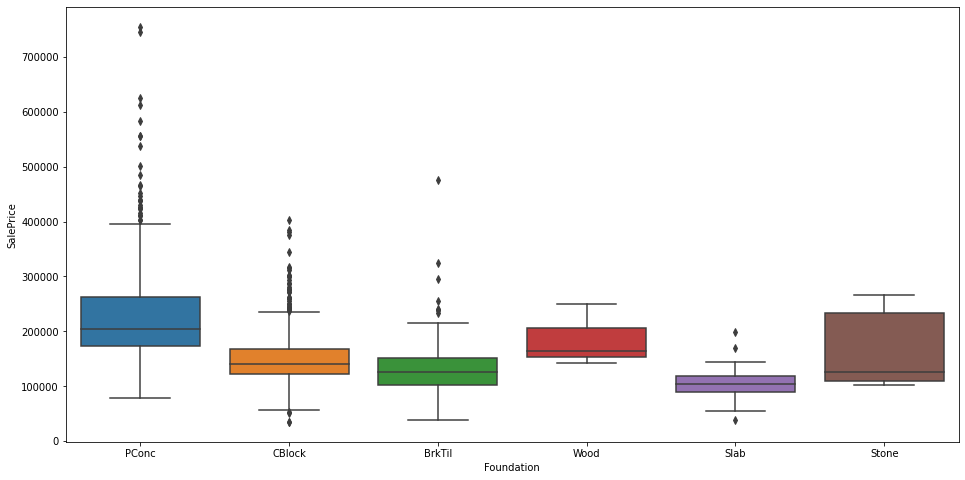

In [ ]:
categorical_wo_ordering_data_list = ['MSSubClass', 'SaleType', 'SaleCondition', 'MiscFeature', 'GarageType',
                                     'Heating', 'CentralAir', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                                     'MasVnrType', 'HouseStyle', 'MSZoning', 'Street', 'Alley', 'LotConfig', 'Neighborhood',
                                     'Condition1', 'Condition2', 'BldgType', 'Foundation']

for var in categorical_wo_ordering_data_list:
  data = pd.concat( [housing['SalePrice'], housing[var]], axis=1) # I believe this takes the two specified axis and pairs them. 
  f, ax = plt.subplots(figsize=(16,8))
  fig = sns.boxplot(x = var, y = 'SalePrice', data=data)

Ok so what we're looking for here is highly differentiated categories. Because there is no idea of ordering we at least want one-hot encoding to save us. I will probably take some of these out but we'll see later. Now, lets move onto the numerical columns: 

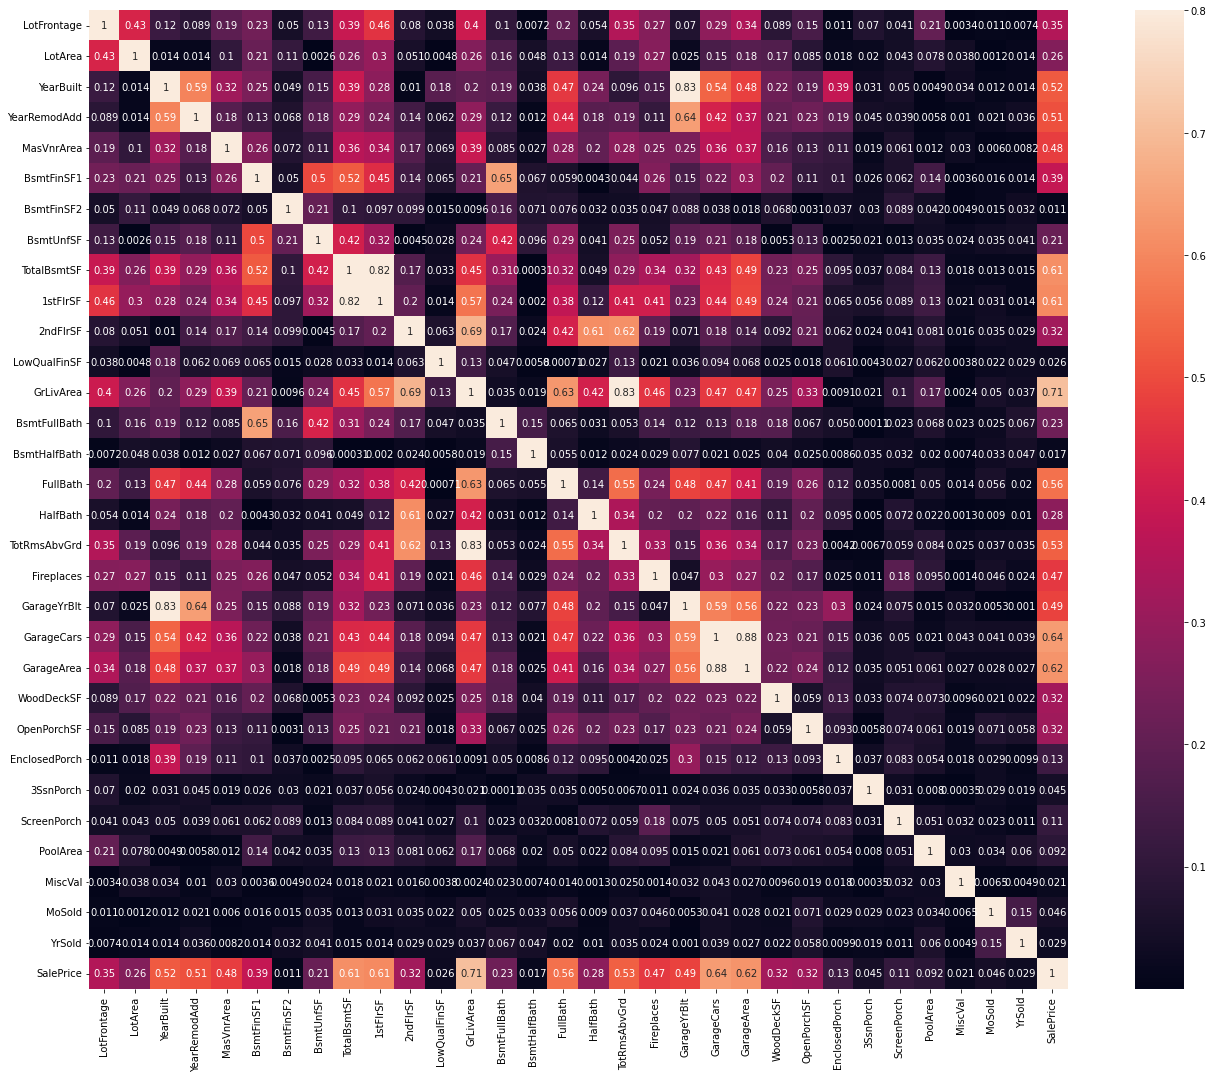

In [12]:
numerical_data_list = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 
                       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
                       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 
                       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
                       'MiscVal', 'MoSold', 'YrSold']

corr_df = housing[numerical_data_list + ['SalePrice']].corr()
f, ax = plt.subplots( figsize = (24, 18) )
sns.heatmap( abs(corr_df), vmax = 0.8, square=True, annot=True )


Note that here we are graphing the absolute value of the correlation. This is because I only care about the magnitude of the correlation rather than the value itself. 

Our variables have ranges of correlations. Some variables (MoSold) is dead useless while others are very useful (GrLivArea). So what I want to do is sift out the useless variables from the more useful variables. 

From what I can see, I want to be super picky about which columns I want to retain. 

Good Variables: 

- GrLivArea: 0.71
- GarageCars: 0.64
- GarageArea: 0.62
- TotalBsmtSF: 0.61
- 1stFlrSF: 0.61
- FullBath: 0.56
- HalfBath: 0.56
- TotRmsAbvGrd: 0.53
- YearBuilt: 0.52
- YearRemodAdd: 0.51
- GarageYrBlt: 0.49
- MasVnrArea: 0.48
- Fireplaces: 0.47
- BsmtFinSF1: 0.39
- LotFrontage: 0.35
- WoodDeckSF: 0.32
- OpenPorchSF: 0.32
- 2ndFlrSF: 0.32
- LotArea: 0.26

Bad Variables: 
- BsmtFullBath: 0.23
- BsmtUnfSF: 0.21
- EnclosedPorch: 0.13
- ScreenPorch: 0.11
- PoolArea: 0.092
- MiscVal: 0.021
- MoSold: 0.046
- YrSold: 0.029
- BsmtFinSF2: 0.011
- LowQualFinSF: 0.026
- BsmtHalfBath: 0.017
- 3SnProch: 0.045

Ok so a lot of these are really good. But a lot of them are not. I'll make 0.25 the cutoff and make as many of the "relevant" bad variables into custom variables as possible. Note that the cutoff value was determined after extensive testing (not shown here). 

Now lets move onto engineering some variables: 

In [8]:
SqFtPerRoomXYZ = housing["GrLivArea"] / (housing['TotRmsAbvGrd'] + housing["FullBath"] + housing["HalfBath"] + housing["KitchenAbvGr"])
BathroomsXYZ = housing["FullBath"] + housing["BsmtFullBath"] + 0.5*( housing['HalfBath'] + housing["BsmtHalfBath"] )
AboveGroundSFXYZ = housing["1stFlrSF"] + housing["2ndFlrSF"]
YearsSinceRenovationXYZ = 2011 - housing["YearRemodAdd"] | 2011 - housing["YearBuilt"]

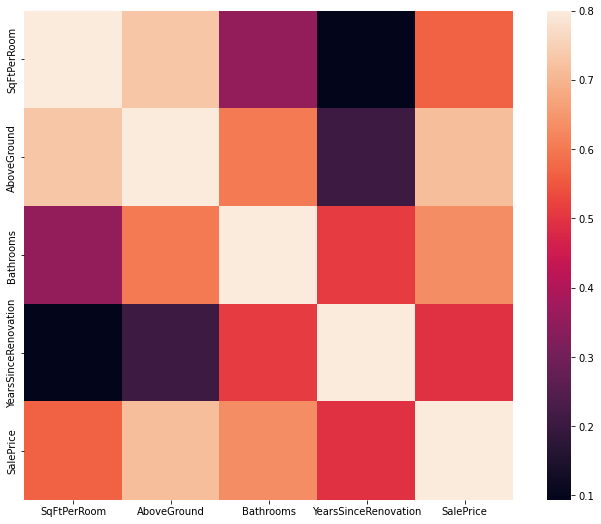

In [9]:
added_data_df = pd.Series(SqFtPerRoomXYZ, name="SqFtPerRoom").to_frame()
added_data_df['AboveGround'] = AboveGroundSFXYZ
added_data_df['Bathrooms'] = BathroomsXYZ
added_data_df['YearsSinceRenovation'] = YearsSinceRenovationXYZ
added_data_df['SalePrice'] = housing['SalePrice']



#pd.concat(SqFtPerRoomXYZ, BathroomsXYZ, AboveGroundSFXYZ, YearsSinceRenovationXYZ, housing['SalePrice'])

corr_df = added_data_df.corr()
f, ax = plt.subplots( figsize = (12,9) )
sns.heatmap( abs(corr_df), vmax = 0.8, square=True )

Great! A lot of these engineered features work really well with SalePrice and aren't particularly well correlated with one another. This is good for us because it means that we are adding meaningful data that isn't already accounted for within other datapoints. 

##  Step 4: Data Preparation and Cleaning
Since we can only use the "train.csv", you have to "artificially" split the data into training set, validation set, and test set. You may use the `train_test_split()` function *twice*: first is to split into train and test, then to split the train again into training and validation sets.

Next, you need to construct the following:

* **Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the `Imputer` class. 

* **Feature Scaling:** Your task is to call the `StandardScaler` to normalize the value of each feature.

* **Transformation Pipeline:** More importantly, you will need to integrate the above operations into a `Pipeline` to process and transform the training data (via `fit_transform()`), then use the same pipeline to transform any validation and testing data (using `transform()` only).

Before we get to splitting the data into the training and test data, I want to transform SalePrice via log. As mentioned earlier, SalePrice is highly skewed and transforming SalePrice via log can produce massive gains in accuracy (I tested this). 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 12.02 and sigma = 0.40



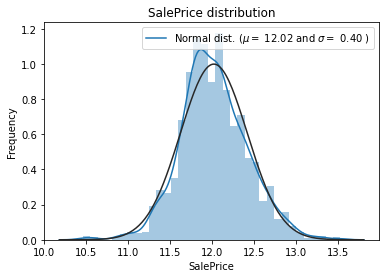

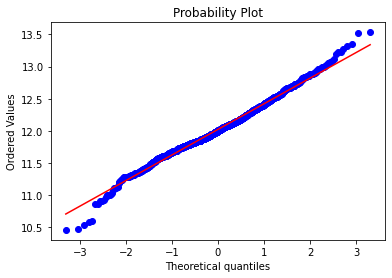

In [10]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
housing["SalePrice"] = np.log1p(housing["SalePrice"])

#Check the new distribution 
sns.distplot(housing['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(housing['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(housing['SalePrice'], plot=plt)
plt.show()

Wow! That looks a lot better. Except for the very extremes of the data, our interior is mostly bell-shaped. Now lets shuffle split our data via neighborhood so that all neighborhoods are represented. 

"Neighborhood" as the shuffle split category was pretty arbitrarily selected. I realized early on that we couldn't split by SalePrice because ShuffleSplit prefers categorical data where data is organized into buckets. So for a continuous variable like SalePrice, ShuffleSplit wouldn't work well. A just as good category is Neighborhood because we want to be able to accurately price across a variety of neighborhoods. Housing costs can vary widely with location (as seen in the SalePrice vs Neighborhood Box and Whisker plot above). 

In [11]:
from sklearn.model_selection import ShuffleSplit

split = ShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["Neighborhood"]): 
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

Now lets look at missing values and deal with those. In terms of missing values there are three primary things that I care about: 
- Prevalency: how widespread is the missing data/how much of a feature is missing
- Patterns: Is the data missing in a certain pattern? 
- Usefulness: I am not going to waste time deliberating/analyzing a useless feature

In [12]:
total_missing_data = housing.isnull().sum().sort_values(ascending=False)
percent = ( housing.isnull().sum() / housing.isnull().count() ).sort_values(ascending=False)
missing_data = pd.concat([total_missing_data, percent], axis = 1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageQual,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageYrBlt,81,0.055479


I don't want to handle features that have large amounts of missing data (PoolQC and MiscFeature) and are relatively useless (aren't in my hitlist of features). But if a feature is relatively easy to process while being useful, I am certain I can think up a strategy to deal with it. So here are my following strategies: 

Drop: 
- PoolQC 
- Fence
- GarageCond
- GarageType
- MSZoning
- MasVnrArea
- MasVnrType

Modify with NA: 
- FireplaceQu
- GarageQual
- GarageFinish
- LandContour(Lvl)
- BsmtExposure
- BsmtFinType2
- BsmtCond
- BsmtFinType1
- BsmtQual

Add 0's 
- LotFrontage

Modify: 
- GarageYrBlt (works better with 0's)





In [13]:
from sklearn.base import BaseEstimator, TransformerMixin # I think these are the default classes that we want to inherit from
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# the structure of my transformation pipeline will be as such: 
# ColumnTransformer 
#   - Individual transformer per data type
#     - Removal of specific columns
#     - Onehot encoding/ordinal encoding/normalization
#     - Done

# Note that the columnTransformer by default drops non-specified columns so lets just get the columns we'll be keeping here: 

# Removing: PoolQC, GarageCond, Fence
categorical_w_ordering_data_list = ['GarageQual', 'PavedDrive', 'GarageFinish', 
                                    'FireplaceQu', 'Functional', 'KitchenQual', 'Electrical', 'HeatingQC', 
                                     'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 
                                    'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtExposure',]

cwodl_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('ordinal', OrdinalEncoder())
])

categorical_num_ordering_data_list = ['OverallQual', 'OverallCond']

cnodl_pipe = Pipeline([
    ('standardscaler', StandardScaler())
])

# Removing: MSZoning, GarageType, and MasVnrType
categorical_wo_ordering_data_list = ['MSSubClass', 'SaleType', 'SaleCondition', 'MiscFeature',
                                     'Heating', 'CentralAir', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                                     'HouseStyle', 'Street', 'Alley', 'LotConfig', 'Neighborhood',
                                     'Condition1', 'Condition2', 'BldgType', 'Foundation']

cwoodl_pipe = Pipeline([
    ('encoder', OneHotEncoder())
])

# Remove MasVnrArea, BsmtFinSF2, BsmtUnfSF, EnclosedPorch, LowQualFinSF, BsmtFullBath, BsmtHalfBath, ScreenPorch
#          'PoolArea', 'MiscVal', 'MoSold', 'YrSold'
numerical_data_list = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 
                       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
                       'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 
                       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 
                       'WoodDeckSF', 'OpenPorchSF', '3SsnPorch']

# Added Columns: 
added_cols = ['SqFtPerRoom', 'Bathrooms', 'AboveGroundSF', 'YearsSinceRenovation', 'GarageYears']

num_attribs = list(housing.select_dtypes(include=[np.number]))

# First lets make a transformer to add our specified columns: 

class columnDropperTransformer():
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None):
        return self 

ndl_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)), 
    ('standardscaler', StandardScaler())
])

class EngineeredAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        return None
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X, y=None):
        X["SqFtPerRoom"] = X["GrLivArea"] / (X['TotRmsAbvGrd'] + X["FullBath"] + X["HalfBath"] + X["KitchenAbvGr"])  
        X["Bathrooms"] = X["FullBath"] + X["BsmtFullBath"] + 0.5*( X['HalfBath'] + X["BsmtHalfBath"] )
        X["AboveGroundSF"] = X["1stFlrSF"] + X["2ndFlrSF"]
        X["YearsSinceRenovation"] = 2011 - X["YearRemodAdd"] | 2011 - X["YearBuilt"]
        X['GarageYrBlt'] = X['GarageYrBlt'].fillna(2011)
        X["GarageYears"] = 2011 - X["GarageYrBlt"]

        X = X.drop(['PoolQC', 'GarageCond', 'Fence', 'MSZoning', 'GarageType', 'MasVnrType', 'MasVnrArea', 
                    'BsmtFullBath', 'BsmtUnfSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
                    'MoSold', 'YrSold', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'SalePrice'], axis=1)

        return X

col_transformer = ColumnTransformer( transformers = [('cwodl', cwodl_pipe, categorical_w_ordering_data_list), 
                                                    ('cwoodl', cwoodl_pipe, categorical_wo_ordering_data_list), 
                                                    ('ndl', ndl_pipe, numerical_data_list),
                                                    ('addedndl', ndl_pipe, added_cols),
                                                    ('cnodl', cnodl_pipe, categorical_num_ordering_data_list)
                                                    ])

full_pipeline = Pipeline([
    ('EngineeredAttributesAdder', EngineeredAttributesAdder()), 
    ('col_trans', col_transformer)
])

# , remainder='passthrough'

This pipeline is very complex so I'll go over it in detail when I present. But we basically have a multi-layered pipeline. The reason I needed to use this architecture is due to the way ColumnTransformer works. Basically, if I want to add features within ColumnTransformer I can't. So I have to add features outside of the ColumnTransformer and then apply the ColumnTransformer later on separately. 

Here is a general structure of the pipeline: 

full_pipeline
  - AttributeAdder
    - Adds our relevant values to the dataset and removes some values as well
  - ColumnTransformer
    - cwodl - Categories With Ordering
      - SimpleImputer
      - OrdinalEncoder
    - cwoodl - Categories W/O Ordering
      - OneHotEncoder
    - ndl - Numeric Data
      - SimpleImputer
      - StandardScaler
    - addedndl - Added Features Numeric Data
      - SimpleImputer
      - StandardScaler
    - cnodl - Numerical Categories
      - StandardScaler

But now we can just fit our pipeline to the overall dataset and then apply that pipeline to our strat_train_set and strat_test_set that we made via the ShuffleSplit.

In [14]:
full_pipeline.fit(housing)

strat_train_set_labels = strat_train_set['SalePrice'].copy()
strat_train_set_prepared = full_pipeline.transform(strat_train_set)

strat_test_set_labels = strat_test_set['SalePrice'].copy()
strat_test_set_prepared = full_pipeline.transform(strat_test_set)

## Step 5: Model Selection
You should use (at the minimum) the basic ML models which we’ve covered: `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. Optionally, you may go for the extra miles by doing some research and try some more advanced models (ie. `Artificial Neural Networks`). You may use `RMSE` as the performance measure.

You must use 5-fold CV on the data set to evaluate the performance of your models (following the sample codes on Colab 02).


In [15]:
# This is a general function to compute the RMSE as well as a visual

from sklearn.metrics import mean_squared_error

def rmse_calculator(pred, actual): 
  lin_mse = mean_squared_error(np.exp(actual), np.exp(pred) )
  lin_rmse = np.sqrt(lin_mse)
  return lin_rmse

def graph_outputter(pred, actual, titleString): 
  predicted_value = np.exp( pred )
  true_value = np.exp( actual )
  lin_mse = mean_squared_error(predicted_value, true_value )
  lin_rmse = np.sqrt(lin_mse)


  plt.figure(figsize=(10,10))
  plt.scatter(true_value, predicted_value, c='crimson')

  p1 = max(max(predicted_value), max(true_value))
  p2 = min(min(predicted_value), min(true_value))
  plt.plot([p1, p2], [p1, p2], 'b-')
  plt.title(titleString)
  plt.xlabel('True Values', fontsize=15)
  plt.ylabel('Predictions', fontsize=15)
  plt.axis('equal')
  plt.text(200000, 600000, "The RMSE is equal to: " + str(lin_rmse) )
  plt.show()

In [16]:
# Training a linear regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(strat_train_set_prepared, strat_train_set_labels)

LinearRegression()

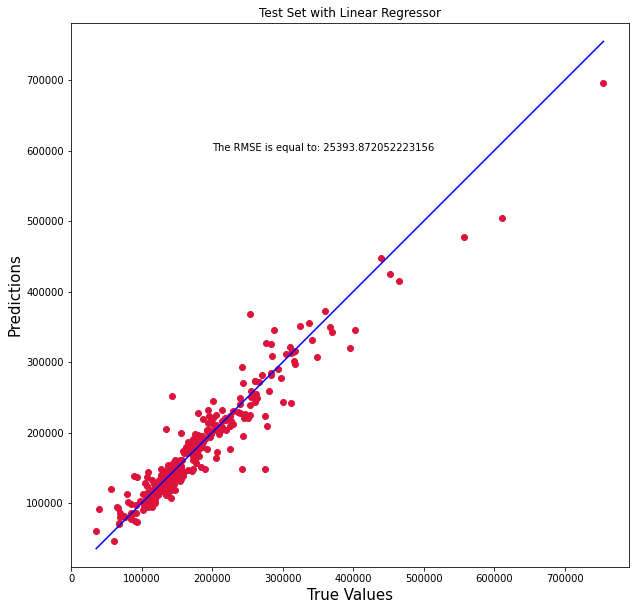

In [17]:
# Assessing the linear regression model
strat_test_set_predictions = lin_reg.predict(strat_test_set_prepared)
strat_test_set_predictions = np.where( strat_test_set_predictions>30, np.median(strat_test_set_predictions), strat_test_set_predictions )
strat_test_set_predictions = np.where( strat_test_set_predictions<0, np.median(strat_test_set_predictions), strat_test_set_predictions )
strat_test_set_labels = np.clip(strat_test_set_labels, 0, 1000000)

graph_outputter(strat_test_set_predictions, strat_test_set_labels, "Test Set with Linear Regressor")

Linear Regression does pretty well and is probably going to be the baseline model. So for any other model to even be worth exploring it would have to beat Linear Regression. But this RMSE value is very promising as we are already sub 30k. 

In [18]:
# Training on Ridge Regression
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(strat_train_set_prepared, strat_train_set_labels)

Ridge()

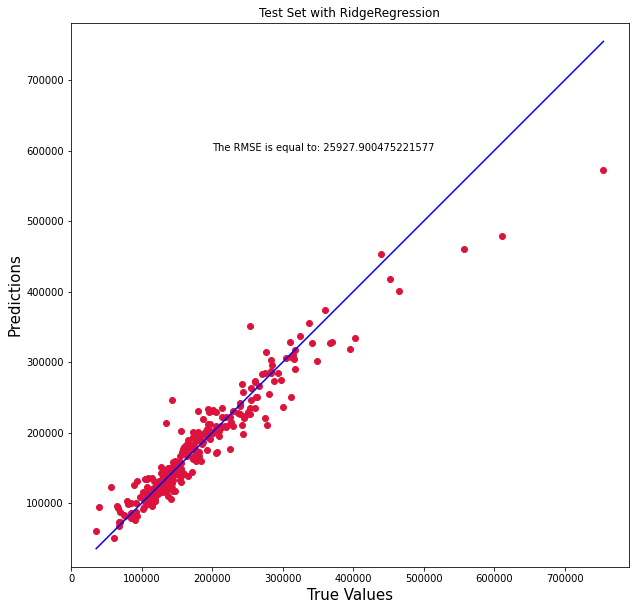

In [19]:
strat_test_set_predictions_ridge = ridge_reg.predict(strat_test_set_prepared)
strat_test_set_predictions_ridge = np.where( strat_test_set_predictions_ridge>30, np.median(strat_test_set_predictions_ridge), strat_test_set_predictions_ridge )
strat_test_set_predictions_ridge = np.where( strat_test_set_predictions_ridge<0, np.median(strat_test_set_predictions_ridge), strat_test_set_predictions_ridge )
graph_outputter(strat_test_set_predictions_ridge, strat_test_set_labels, "Test Set with RidgeRegression")

In [20]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(strat_train_set_prepared, strat_train_set_labels)

DecisionTreeRegressor(random_state=42)

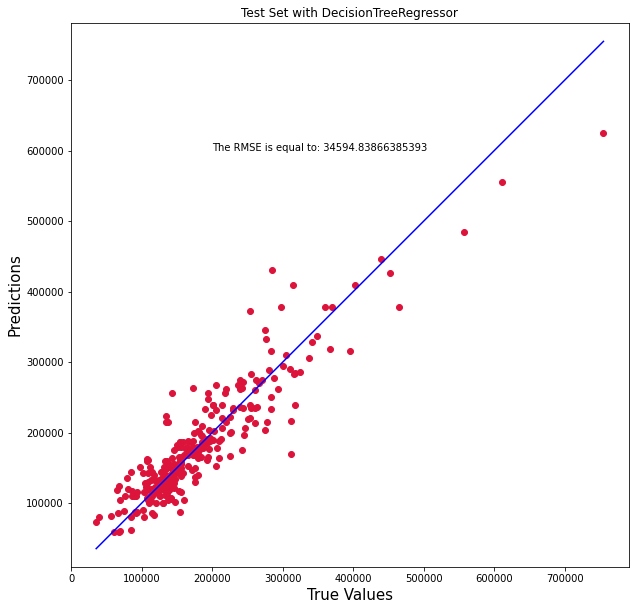

In [21]:
strat_test_set_predictions_tree = tree_reg.predict(strat_test_set_prepared)
strat_test_set_predictions_tree = np.where( strat_test_set_predictions_tree>30, np.median(strat_test_set_predictions_tree), strat_test_set_predictions_tree )
strat_test_set_predictions_tree = np.where( strat_test_set_predictions_tree<0, np.median(strat_test_set_predictions_tree), strat_test_set_predictions_tree )
graph_outputter(strat_test_set_predictions_tree, strat_test_set_labels, "Test Set with DecisionTreeRegressor")

I am unsure as to why we use a DecisionTreeRegressor at all. I feel like a DecisionTree is poorly suited to this task as we are trying to map onto a continous value (SalePrice) and I believe decision tree is meant to map to discrete values? 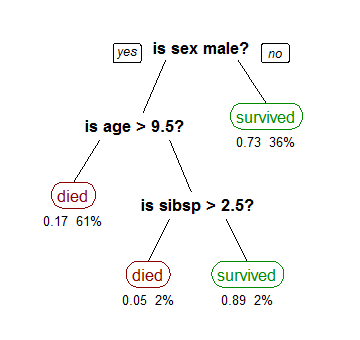

also kind of amazing how I can paste in the base64 png encoding of an image and colab will render it

But to the topic at hand, I think the decision tree would just map to the values that already exist in the train set and be unable to produce the values that are required in the test set giving us sub-par performance. 

In [22]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(strat_train_set_prepared, strat_train_set_labels)

RandomForestRegressor(random_state=42)

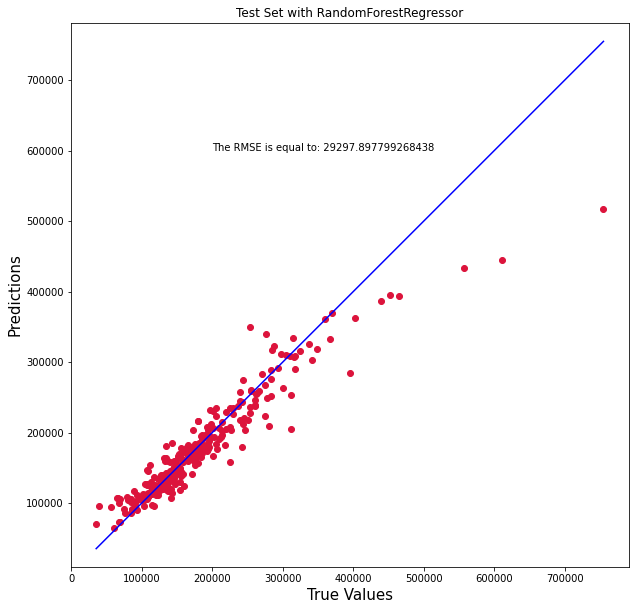

In [23]:
strat_test_set_predictions_RFR = forest_reg.predict(strat_test_set_prepared)
strat_test_set_predictions_RFR = np.where( strat_test_set_predictions_RFR>30, np.median(strat_test_set_predictions_RFR), strat_test_set_predictions_RFR )
strat_test_set_predictions_RFR = np.where( strat_test_set_predictions_RFR<0, np.median(strat_test_set_predictions_RFR), strat_test_set_predictions_RFR )
graph_outputter(strat_test_set_predictions_RFR, strat_test_set_labels, "Test Set with RandomForestRegressor")

And the analysis for the Decision Tree applies to the Random Forest Regressor as well. 

An interesting thing to note is that early on in SalePrice (100000-400000) we have very high accuracy, it is only out of this range does accuracy drop heavily. This makes sense because the number of datapoints that range in such high SalePrice is very low. This is acceptable as SalePrices in general will probably skew to the lower-end with high-price houses being more rare. 

Lets do some cross validation to make sure we aren't going too crazy here: 

In [24]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    scores = scores
    print("Scores:", scores )
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

Lets perform cross_validation for all four models: 

In [25]:
for model in [lin_reg, ridge_reg, tree_reg, forest_reg]: 
  scores = cross_val_score(model, strat_train_set_prepared, strat_train_set_labels,
                          scoring="neg_mean_squared_error", cv=10)
  rmse_scores = np.sqrt(-scores)
  
  print()
  print('\033[1m'  + type(model).__name__)
  print('\033[1m')
  display_scores(rmse_scores)


LinearRegression

Scores: [2.40072011e+08 9.75203657e+08 1.03247323e-01 2.54722413e+07
 3.00926759e+09 1.50914241e+08 2.32916006e+09 2.91728588e+08
 6.35114394e+08 3.51762252e+09]
Mean: 1117455530.3482974
Standard deviation: 1260469521.0637264

Ridge

Scores: [0.10948312 0.13959424 0.10439292 0.16418742 0.22125365 0.14212088
 0.12146206 0.11525258 0.12402504 0.09520161]
Mean: 0.13369735141847863
Standard deviation: 0.03494559340730837

DecisionTreeRegressor

Scores: [0.18298209 0.20770525 0.18828825 0.2499049  0.24718535 0.22859333
 0.23092639 0.22861752 0.21046139 0.18308506]
Mean: 0.21577495381929976
Standard deviation: 0.023881264391161457

RandomForestRegressor

Scores: [0.1012965  0.14932173 0.12860798 0.18422051 0.16321723 0.18244847
 0.14427374 0.13984877 0.13676485 0.10438543]
Mean: 0.14343852019931064
Standard deviation: 0.02681402031152632


For some reason I've had this issue where the RMSE values for the LinearRegression are completely bogus (at least for this cross_val_score test). So I've been using Ridge Regression as a proxy instead. But looking past the cross validation (at the graphs with the diagonal line) we can see that the models perform pretty well

- Linear - 25394
- Ridge - 25928
- DecisionTree - 34595
- RandomForest - 29298

But these RMSE values are only after being tested on the test data (1/5th of the original test data) so the cross validation scores are a better representation of the model's performance. 

In terms of cross validation we can see that the Ridge regressor and the Linear Regressor are clearly in the lead. Note how the ridge regressor has a lower standard deviation indicating that even when being incorrect, we are closer to the true value. 

The reason the DecisionTreeRegressor is so bad is because I am pretty sure that all it does is partition the data into discrete buckets and then further sub-divide those buckets finally assigning datapoints to individual prices. This isn't the best approach when it comes to mapping data continuously and is probably a big part of the reason why the DecisionTree performs so poorly. 

But keep in mind that none of these models are tuned very well. 

## Step 6: Model Tuning

In this step, you should attempt to use one of the provided tools for hyperparameter tuning: `GridSearchCV`, `RandomizedSearchCV` to identify the best set of hyperparameters for your model. After tweaking your models, you eventually should report the 5-fold CV RMSE of your tuned model.

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(strat_test_set_prepared, strat_test_set_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

The best hyperparameter combination found is as such: 

In [27]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

What's interesting is that we assume that 8 features is sufficient when we have nearly 200. But this is just a test, I'll expand the feature size when we use the RandomizedSearch. 

Another thing is the n_estimator. It may be more advantageous to use a greater number than 8 as well here. 

In [28]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

Looking at the scores of each hyperparameter combination: 

In [29]:
cvres = grid_search.cv_results_
# zip() is to combine the column "mean_test_score" with struct "params"
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.26978277642661375 {'max_features': 2, 'n_estimators': 3}
0.22458769501678047 {'max_features': 2, 'n_estimators': 10}
0.21450585767894498 {'max_features': 2, 'n_estimators': 30}
0.2340137460846304 {'max_features': 4, 'n_estimators': 3}
0.20742409850291285 {'max_features': 4, 'n_estimators': 10}
0.19546656067441312 {'max_features': 4, 'n_estimators': 30}
0.24208262795911836 {'max_features': 6, 'n_estimators': 3}
0.20352758443795121 {'max_features': 6, 'n_estimators': 10}
0.19725646784125006 {'max_features': 6, 'n_estimators': 30}
0.24312238541261347 {'max_features': 8, 'n_estimators': 3}
0.20591008471883818 {'max_features': 8, 'n_estimators': 10}
0.19483286162077618 {'max_features': 8, 'n_estimators': 30}
0.2668625259684732 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.21285434617801782 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.23489287997149377 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.20918759534481868 {'bootstrap': False, 'max_fe

In [30]:
# View the research results in table format
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007374,0.002622,0.001416,0.000461,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-0.030762,-0.081164,...,-0.072783,0.028475,18,-1.243638e-02,-1.594595e-02,-1.915000e-02,-1.951591e-02,-2.424323e-02,-1.825829e-02,3.935422e-03
1,0.016491,0.001317,0.002300,0.000442,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-0.030582,-0.048898,...,-0.050440,0.020807,11,-8.352092e-03,-9.957272e-03,-8.063649e-03,-9.679724e-03,-1.214722e-02,-9.639992e-03,1.451344e-03
2,0.048344,0.005100,0.003706,0.000200,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-0.024597,-0.041667,...,-0.046013,0.020400,10,-6.793064e-03,-6.965496e-03,-5.879666e-03,-7.127797e-03,-7.681775e-03,-6.889559e-03,5.864001e-04
3,0.006077,0.000347,0.001194,0.000059,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-0.038430,-0.030089,...,-0.054762,0.019829,13,-1.425663e-02,-9.613631e-03,-1.837655e-02,-1.906701e-02,-2.125709e-02,-1.651418e-02,4.127824e-03
4,0.017560,0.003435,0.001925,0.000048,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-0.023148,-0.032111,...,-0.043025,0.018384,7,-8.810876e-03,-7.657541e-03,-8.506774e-03,-8.824466e-03,-8.988693e-03,-8.557670e-03,4.762135e-04
5,0.043849,0.001417,0.004266,0.001126,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-0.022180,-0.028165,...,-0.038207,0.016500,2,-6.108453e-03,-5.455569e-03,-6.240721e-03,-6.702025e-03,-6.903902e-03,-6.282134e-03,5.055677e-04
6,0.006461,0.000871,0.001141,0.000029,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-0.027084,-0.058283,...,-0.058604,0.022140,15,-1.717319e-02,-1.534806e-02,-1.614504e-02,-1.684537e-02,-1.977518e-02,-1.705737e-02,1.496594e-03
7,0.018178,0.001452,0.002130,0.000464,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-0.018592,-0.029743,...,-0.041423,0.019113,5,-1.040219e-02,-8.140117e-03,-6.524179e-03,-6.487593e-03,-8.841314e-03,-8.079079e-03,1.478657e-03
8,0.049072,0.003971,0.003943,0.000984,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-0.019552,-0.029112,...,-0.038910,0.018333,3,-6.280510e-03,-5.827799e-03,-5.225911e-03,-5.613975e-03,-6.639788e-03,-5.917597e-03,4.963762e-04
9,0.006315,0.000289,0.001154,0.000018,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-0.031646,-0.034578,...,-0.059108,0.035384,16,-1.456151e-02,-1.666794e-02,-1.447537e-02,-1.877079e-02,-1.830592e-02,-1.655631e-02,1.804830e-03


In [31]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=500),
        'max_features': randint(low=1, high=500),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(strat_train_set_prepared, strat_train_set_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/para

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa018b94750>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa014c805d0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [32]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.14141836057711418 {'max_features': 103, 'n_estimators': 436}
nan {'max_features': 349, 'n_estimators': 271}
0.14275009112148282 {'max_features': 107, 'n_estimators': 72}
0.14874803792288332 {'max_features': 189, 'n_estimators': 21}
0.1426198275626244 {'max_features': 103, 'n_estimators': 122}
nan {'max_features': 467, 'n_estimators': 215}
nan {'max_features': 331, 'n_estimators': 459}
0.1408812433210397 {'max_features': 88, 'n_estimators': 373}
0.1412519778454255 {'max_features': 100, 'n_estimators': 360}
0.1440788107235957 {'max_features': 152, 'n_estimators': 131}


Now lets inspect the feature importance: 

In [33]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.86271953e-02, 1.24351751e-02, 1.37741097e-02, 3.83793922e-03,
       1.06646992e-03, 1.32882316e-02, 2.17006804e-03, 1.25299363e-02,
       7.36284700e-03, 1.22266990e-03, 0.00000000e+00, 1.11275658e-03,
       2.85045165e-02, 3.99084641e-03, 9.56443288e-03, 1.47105875e-03,
       1.48022758e-02, 3.09950452e-03, 4.92331290e-03, 1.36149858e-03,
       4.72504190e-03, 6.73348947e-05, 1.09858525e-05, 1.24911932e-03,
       1.21511447e-02, 2.05376112e-04, 0.00000000e+00, 2.05756582e-04,
       2.26429316e-06, 2.62499798e-04, 5.57772615e-04, 2.66843557e-04,
       0.00000000e+00, 2.70669893e-04, 8.21907406e-04, 0.00000000e+00,
       0.00000000e+00, 6.99036625e-06, 0.00000000e+00, 0.00000000e+00,
       3.15410010e-03, 0.00000000e+00, 2.77173701e-03, 3.56775329e-03,
       0.00000000e+00, 3.02478705e-05, 1.47992251e-05, 7.54832098e-03,
       3.33166329e-03, 0.00000000e+00, 0.00000000e+00, 3.25977410e-03,
       0.00000000e+00, 4.59052617e-05, 0.00000000e+00, 6.19457465e-04,
      

In [34]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(strat_test_set_prepared)

final_mse = mean_squared_error( np.exp(strat_test_set_labels), np.exp(final_predictions) )
final_rmse = np.sqrt(final_mse)

In [35]:
final_rmse

19045.148156796986

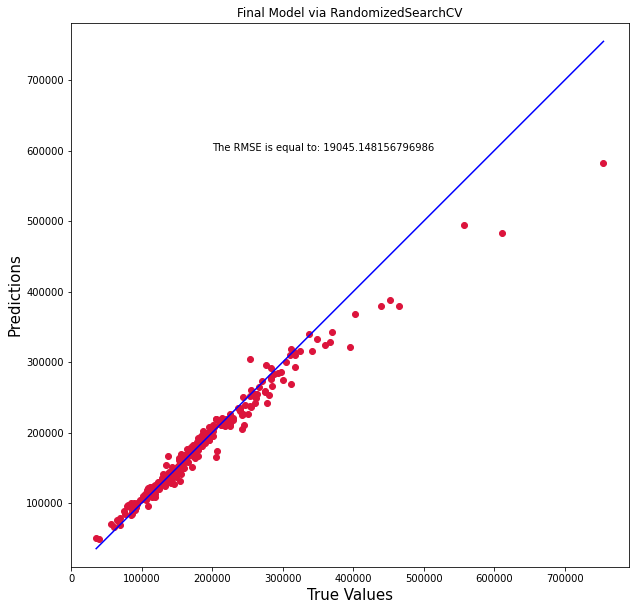

In [36]:
graph_outputter(final_predictions, strat_test_set_labels, "Final Model via RandomizedSearchCV")

A 95% confidence interval for the test RMSE:

In [37]:
from scipy import stats

confidence = 0.95
squared_errors = ( np.exp(final_predictions) - np.exp(strat_test_set_labels) ) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([11057.1068671 , 24559.63607952])

Because cross_val_score doesn't work well with log values (the square+summation is difficult to undo), I will go about computing the cross_val score manually via a 5-fold cross_validation. 

I will do this by shufflespliting multiple times into each validation set. 

yeah, yeah I'm only supposed to split twice but unless I do this I can't compute the 5-fold CV RMSE. 

In [38]:
from sklearn.model_selection import ShuffleSplit
RMSE_scores = []

full_pipeline.fit(housing)

split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["Neighborhood"]): 
  temp_model = sklearn.base.clone(final_model)
  CV_strat_train_set = housing.loc[train_index]
  CV_strat_test_set = housing.loc[test_index]

  CV_strat_train_set_labels = CV_strat_train_set['SalePrice'].copy()
  CV_strat_train_set_prepared = full_pipeline.transform(CV_strat_train_set)

  CV_strat_test_set_labels = CV_strat_test_set['SalePrice'].copy()
  CV_strat_test_set_prepared = full_pipeline.transform(CV_strat_test_set)

  temp_model.fit( CV_strat_train_set_prepared, CV_strat_train_set_labels )

  CV_test_set_preds = final_model.predict( CV_strat_test_set_prepared)
  
  RMSE_scores.append( rmse_calculator( CV_test_set_preds, CV_strat_test_set_labels ) )

In [39]:
display_scores( np.array(RMSE_scores) )

Scores: [19045.1481568  29065.53585883 36580.58257767 33945.12853915
 24986.18239031]
Mean: 28724.515504550123
Standard deviation: 6273.024341130645


Ok $28724.52 seems pretty good. And I can't really complain about such a low average RMSE value. But lets see if we can do even better:

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, rv_continuous
import xgboost as xg
import random
import sys

param_distribs = {
    'n_estimators':[500],
    'min_child_weight':[4,5], 
    'gamma':[i/10.0 for i in range(3,6)],  
    'subsample':[i/10.0 for i in range(6,11)],
    'colsample_bytree':[i/10.0 for i in range(6,11)], 
    'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

XGB_model = xg.XGBRegressor()
rnd_search = RandomizedSearchCV(XGB_model, param_distributions=param_distribs,
                                n_iter=100, cv=5, scoring='neg_mean_squared_error')
rnd_search.fit(strat_train_set_prepared, strat_train_set_labels)

RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=100,
                   param_distributions={'booster': ['gbtree', 'gblinear'],
                                        'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'eta': [0.3, 0.4, 0.5],
                                        'eval_metric': ['rmse'],
                                        'gamma': [0.3, 0.4, 0.5],
                                        'max_depth': [2, 3, 4, 6, 7],
                                        'min_child_weight': [4, 5],
                                        'n_estimators': [500],
                                        'objective': ['reg:squarederror',
                                                      'reg:tweedie'],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   scoring='neg_mean_squared_error')

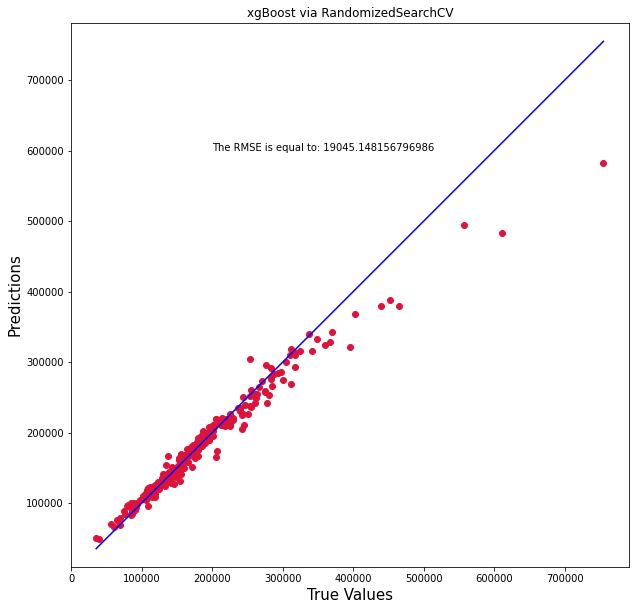

In [41]:
final_xgb_model = rnd_search.best_estimator_

final_xgb_predictions = final_model.predict(strat_test_set_prepared)

graph_outputter(final_xgb_predictions, strat_test_set_labels, "xgBoost via RandomizedSearchCV")

In [42]:
from sklearn.model_selection import ShuffleSplit
RMSE_scores = []

full_pipeline.fit(housing)

split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["Neighborhood"]): 
  temp_model = sklearn.base.clone(final_xgb_model)
  CV_strat_train_set = housing.loc[train_index]
  CV_strat_test_set = housing.loc[test_index]

  CV_strat_train_set_labels = CV_strat_train_set['SalePrice'].copy()
  CV_strat_train_set_prepared = full_pipeline.transform(CV_strat_train_set)

  CV_strat_test_set_labels = CV_strat_test_set['SalePrice'].copy()
  CV_strat_test_set_prepared = full_pipeline.transform(CV_strat_test_set)

  temp_model.fit( CV_strat_train_set_prepared, CV_strat_train_set_labels )

  CV_test_set_preds = temp_model.predict( CV_strat_test_set_prepared)
  
  RMSE_scores.append( rmse_calculator( CV_test_set_preds, CV_strat_test_set_labels ) )

In [43]:
display_scores( np.array(RMSE_scores) )

Scores: [31624.57785518 30544.85058797 33537.82649985 38763.54325056
 22803.45107769]
Mean: 31454.849854250275
Standard deviation: 5166.418448349968


Damn. That value isn't very good. What about if we take the combinations of multiple ML models together. That should definitely improve our RMSE. 

In [52]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
import xgboost as xgb
import lightgbm as lgb


def manual_rmse_scorer(housing, final_model, full_pipeline):
  RMSE_scores = []

  full_pipeline.fit(housing)

  split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
  for train_index, test_index in split.split(housing, housing["Neighborhood"]): 
    temp_model = sklearn.base.clone(final_model)
    CV_strat_train_set = housing.loc[train_index]
    CV_strat_test_set = housing.loc[test_index]

    CV_strat_train_set_labels = CV_strat_train_set['SalePrice'].copy()
    CV_strat_train_set_prepared = full_pipeline.transform(CV_strat_train_set)

    CV_strat_test_set_labels = CV_strat_test_set['SalePrice'].copy()
    CV_strat_test_set_prepared = full_pipeline.transform(CV_strat_test_set)

    temp_model.fit( CV_strat_train_set_prepared, CV_strat_train_set_labels )

    CV_test_set_preds = temp_model.predict( CV_strat_test_set_prepared)
    
    RMSE_scores.append( rmse_calculator( CV_test_set_preds, CV_strat_test_set_labels ) )

  return np.array(RMSE_scores)

Lets first tune as many of our models as we can: 
- Lasso Regression
- Elastic Net Regression 
- Kernel Ridge Regression
- Random Forest Regression (hyper threading and subset support over GradientBoostingRegressor)
- LightGBM

Note that a lot of these models were hand-tuned because RandomizedSearchCV didn't really work (took too long). Most of the time I found good parameters online and tweaked them from there. 

In [56]:
LR_model = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005))
LR_model.fit(strat_train_set_prepared, strat_train_set_labels)
Lasso_RMSE_scores = manual_rmse_scorer(housing, LR_model, full_pipeline)
display_scores( Lasso_RMSE_scores )

Scores: [24307.92510127 21007.34502419 39149.82054689 25859.55562324
 17697.01893222]
Mean: 25604.333045561616
Standard deviation: 7333.266108994607


In [57]:
ENet_model = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.0005, l1_ratio=0.9))
ENet_model.fit(strat_train_set_prepared, strat_train_set_labels)
ENet_RMSE_scores = manual_rmse_scorer(housing, ENet_model, full_pipeline)
display_scores( ENet_RMSE_scores )

Scores: [24422.40730761 21152.13156028 38822.01676538 26154.46581674
 17739.42707148]
Mean: 25658.089704298276
Standard deviation: 7184.304456074105


In [60]:
param_distribs = {
    'alpha': [i/100.0 for i in range(0,60)],
}

KRR_model = KernelRidge()
KRR_search = RandomizedSearchCV(KRR_model, param_distributions=param_distribs,
                                n_iter=100, cv=5, scoring='neg_mean_squared_error')
KRR_search.fit(strat_train_set_prepared, strat_train_set_labels)
KRR_best_model = KRR_search.best_estimator_

KRR_best_model = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.0005, l1_ratio=0.9))
KRR_best_model.fit(strat_train_set_prepared, strat_train_set_labels)
KRR_RMSE_scores = manual_rmse_scorer(housing, KRR_best_model, full_pipeline)
display_scores( KRR_RMSE_scores )

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in so

Scores: [24422.40730761 21152.13156028 38822.01676538 26154.46581674
 17739.42707148]
Mean: 25658.089704298276
Standard deviation: 7184.304456074105


In [98]:
GBR_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05,
                                      max_depth=4, max_features='sqrt',
                                      min_samples_leaf=15, min_samples_split=10, 
                                      loss='huber')
GBR_best_model = GBR_model

GBR_best_model.fit(strat_train_set_prepared, strat_train_set_labels)
GBR_RMSE_scores = manual_rmse_scorer(housing, GBR_best_model, full_pipeline)
display_scores( GBR_RMSE_scores )

Scores: [25202.94919964 23675.98005952 33532.59105418 27645.13897424
 18983.03849699]
Mean: 25807.93955691391
Standard deviation: 4786.148379688046


In [94]:
LGBM_model = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=1000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
LGBM_best_model = LGBM_model

LGBM_best_model.fit(strat_train_set_prepared, strat_train_set_labels)
LGBM_RMSE_scores = manual_rmse_scorer(housing, LGBM_best_model, full_pipeline)
display_scores( LGBM_RMSE_scores )

Scores: [25465.74685193 23038.84900313 27763.84793617 29264.76752537
 19983.84516319]
Mean: 25103.411295960155
Standard deviation: 3316.5786795585545


Now lets take the average of the model's output and use that as our guess instead: 

In [99]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [104]:
LGBM_RMSE_scores = manual_rmse_scorer(housing, AveragingModels(models = model_list ), full_pipeline)
display_scores( LGBM_RMSE_scores )

Scores: [24154.42237938 21096.54050567 34191.5604847  26615.73730172
 17326.74844298]
Mean: 24677.001822889993
Standard deviation: 5681.628975102966


What if there is a better combination of models than all of the models? 

In [109]:
hand_best_model_list = [ENet_model, GBR_best_model, LGBM_best_model]
LGBM_RMSE_scores = manual_rmse_scorer(housing, AveragingModels(models = hand_best_model_list ), full_pipeline)
display_scores( LGBM_RMSE_scores )

Scores: [24722.9740255  21486.0659133  32165.65553171 27458.15145653
 17979.87189203]
Mean: 24762.54376381389
Standard deviation: 4874.707689091198


Ok that's pretty good but what about if we let the computer get combinations of the models for us? 

I don't suggest trying to run this cell as it takes almost over an hour to complete execution. 

Then again I was using itertools.permutation (dumbly) and had the wrong sign for the .mean() < best_mean comparison. /sigh


In [116]:
from itertools import combinations
model_list = [LR_model, ENet_model, KRR_best_model, GBR_best_model, LGBM_best_model]
best_model_list = []
best_mean = 30000

for i in range(1, 5): 
  print(i)
  for subset in itertools.combinations(model_list, i): 
      averaged_models = AveragingModels(models = subset )
      LGBM_RMSE_scores = manual_rmse_scorer(housing, averaged_models, full_pipeline)

      if LGBM_RMSE_scores.mean() < best_mean: 
        best_model_list = subset

1
2
3
4


In [119]:
best_model_list

(Pipeline(steps=[('robustscaler', RobustScaler()),
                 ('elasticnet', ElasticNet(alpha=0.0005, l1_ratio=0.9))]),
 Pipeline(steps=[('robustscaler', RobustScaler()),
                 ('elasticnet', ElasticNet(alpha=0.0005, l1_ratio=0.9))]),
 GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                           max_features='sqrt', min_samples_leaf=15,
                           min_samples_split=10, n_estimators=1000),
 LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, feature_fraction=0.2319,
               learning_rate=0.05, max_bin=55, min_data_in_leaf=6,
               min_sum_hessian_in_leaf=11, n_estimators=1000, num_leaves=5,
               objective='regression'))

In [118]:
LGBM_RMSE_scores = manual_rmse_scorer(housing, AveragingModels(models = best_model_list ), full_pipeline)
display_scores( LGBM_RMSE_scores )

Scores: [24035.91050876 21369.56952969 33114.63424703 26718.5727093
 17471.73768954]
Mean: 24542.084936864638
Standard deviation: 5263.773883003239


Wow! this value is so good!!! Hopefully it gets me in the top 10. 

## Step 7: Solution Presentation
Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/supervisor). Focus on answering the following: 

* How can you pitch your solution to this project? 
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution?

As one can see we have an RMSE of \~\$24542 that has been cross-validated using the ElasticNet, GradientBoostingRegressor, and LGBMRegressor models. The ~$24542 is pretty good. (I am going to assume we are some time of asset acquisition company which is trying to bid out competitors/assess the true value of a house.)

This should give us a good estimate of the value of a house maybe even enough to accurately price and purchase the house. Further, with this model, we will be better able to avoid bidding for a house that we cannot turn a profit on (avoid over-bidding). Further, if I was able to recorrelate the columns to the feature-importance, I would gain much understanding into how important components of the house are. This includes things such as 

In terms of learning more about the problem, I couldn't do the most due to the complexity of my pipeline and its obfuscation of the column titles when trying to observe feature importance. But judging from the number of 0's (and other low values)we can tell that much of the features are unimportant and their removal could potentially improve model performance. But I think the most I learned about the problem is actually related to how evenly distributed the feature importance matrix was. No feature was significantly more important than the other showing how house pricing depends on a variety of factors. 

There are a couple methods to improving the solution: 
- Using better models
- Using more data
- Using better data

I think the using better models idea is obvious. This doesn't just mean using better algorithms but tuning the current models to be better. There could be more advanced/better methods of ensembling all of these models together as well as inspecting how the interplay of ensembling/tuning works. But I remember from lecture observing that models actually didn't matter as much as data. So I think the marginal improvement in this sector is low. And this was kind of supported by our own observations. The difference of RMSE between Linear Regression and our final model was only about \~1000 dollars. This isn't that much of an improvement (\~4%). More time could be invested in the actual data itself (better processing methods/collection)

For using more data, this is a pretty sparse dataset. ~1400 data points is not that many in such a diverse high-feature area such as house pricing. I firmly believe that the data points do not capture the complete depth/story that is within housing prices. With more diverse data we could probably do a better job in assessing SalePrice. 

And finally we could use better data. Either by engineering features, pipelining better, or by inspecting feature importance and removing features accordingly. 

I'd like to end on one final note. I liked this project a lot and it was very educational/informative for me. Although this notebook appears sparse, it was originally a warzone of cells and experiments I was doing on the side. I started over atleast once becuase the notebook got too busy. Much of my time was invested in doing research and structuring the pipeline but I had a lot of fun. 